## 🐼 **Pandas Zoo** (R)

l contexto de análisis de datos que elegimos fue el de **visitas a un zoológico**. Para ello, crearemos cinco datasets en los que almacenaremos la siguiente información:

- **Entradas vendidas**
- **Hábitats disponibles para visitar**
- **Shows disponibles para visitar**
- **Relación entre entradas vendidas y visitas a hábitats**, incluyendo el nivel de satisfacción de dichas visitas
- **Relación entre entradas vendidas y visitas a shows**, también con sus respectivos niveles de satisfacción

Elegimos este contexto por el **potencial de análisis** que ofrece, ya que estos centros reciben grandes cantidades de personas. Identificar las **preferencias del público** permitiría **aumentar las ganancias** del zoológico, al manejar la oferta de servicios de acuerdo a estas.


## 📊 **Preguntas de investigación**

- ¿Qué días de la semana hay una mayor frecuencia de visitantes según cada rango etario?
- ¿En qué meses hay una mayor frecuencia de visitantes?
- ¿Existe alguna relación entre el tipo de ambiente de cada hábitat y la frecuencia de visitas?
- ¿La duración de los shows afecta la preferencia de los diferentes rangos etarios?
- ¿En qué horario se concentra la mayor cantidad de visitas?
- ¿La presencia de comercios en los hábitats afecta la satisfacción de los visitantes?
- ¿La posibilidad de consumir alimentos dentro de los hábitats influye en la cantidad de visitas?
- ¿Existe una correlación entre el porcentaje de cupos ocupados en los shows y el nivel de satisfacción de los visitantes?
- ¿Existe una correlación entre el tipo de entrada (VIP) y el nivel de satisfacción de los visitantes?
- ¿La adquisición de entradas VIP se relaciona con la asistencia a shows?
- ¿Existe una correlación entre la cantidad de especies en un hábitat y el número de visitas anuales?

## Objetivo
Aplicar las funcionalidades del legnuaje R a los datos obtenidos en la Unidad anterior y comparar la capacidad de análisis de datos con respecto a Pandas.

In [4]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyr)
library(openxlsx)
# library(corrplot) # No utilizada (no fue necesaria)

entradas_limpio <- read.csv("./zoo_dataset/entradas_zoo_limpio.csv")
habitats_limpio <- read.csv("./zoo_dataset/habitats_generado.csv")
shows <- read.csv("./zoo_dataset/shows_generado.csv")
entradas_habitats_limpio <- read.csv("./zoo_dataset/visitas_habitats_limpio.csv")
entradas_shows_limpio <- read.csv("./zoo_dataset/visitas_shows_limpio.csv")
visitas_habitats_limpio <- read.csv("./zoo_dataset/visitas_habitats_limpio.csv")

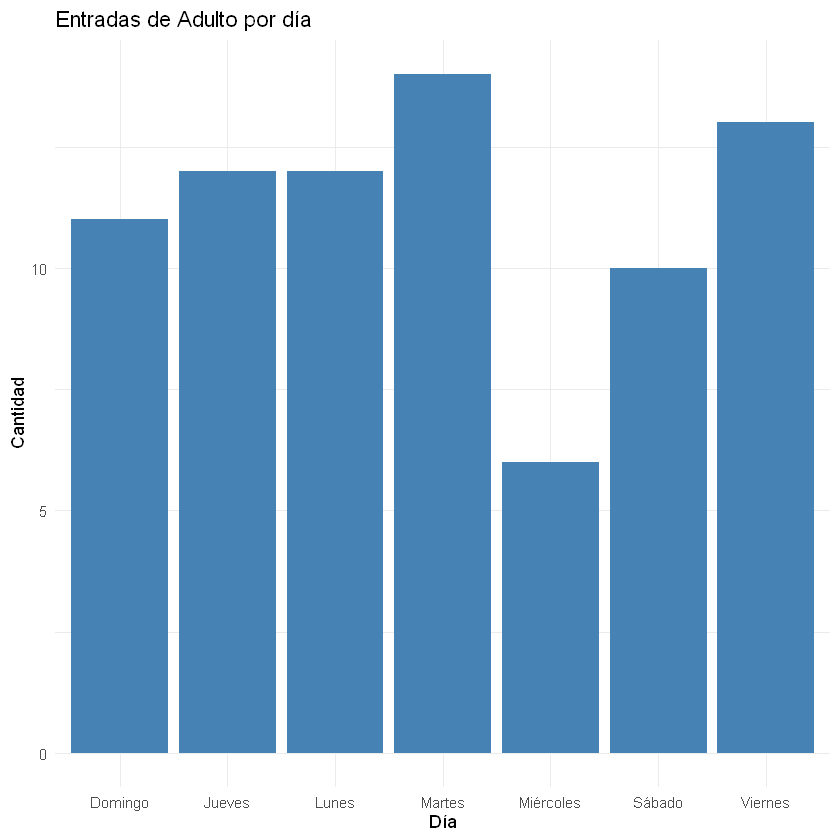

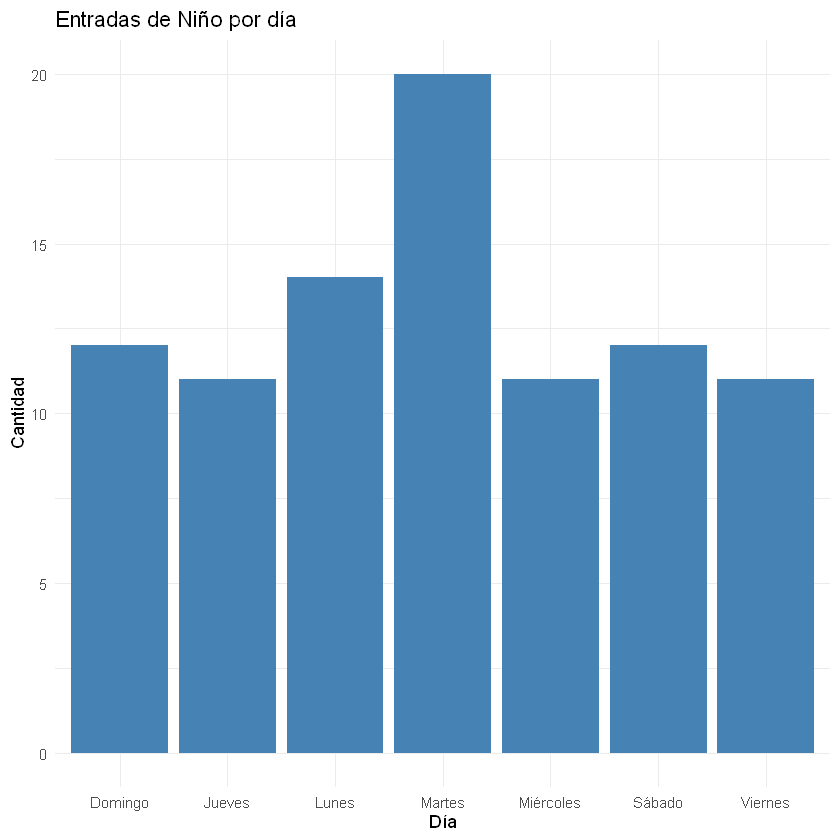

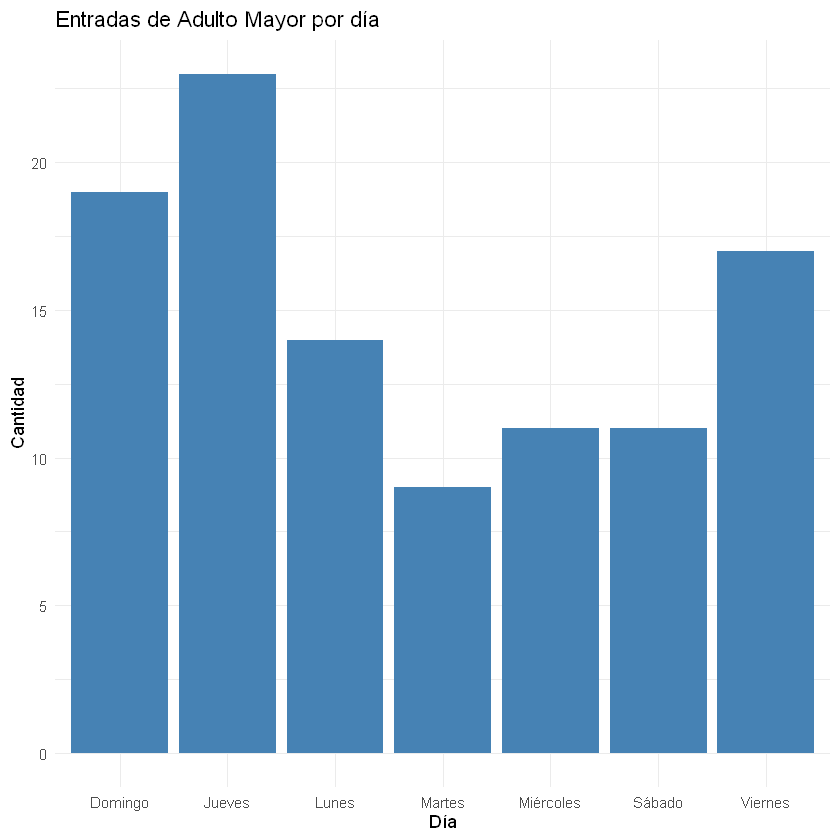

In [5]:
# --- Pregunta 1: Frecuencia de entrada por día y rango etario ---
analisis_pregunta_1 <- function(entradas_df) {
  plots <- list()
  rango_etarios <- c("Adulto", "Niño", "Adulto Mayor")
  
  for (edad in rango_etarios) {
    entradas_filtradas <- entradas_df %>%
      filter(rango_etario == edad) %>%
      count(día_semana)
    
    p <- ggplot(entradas_filtradas, aes(x = día_semana, y = n)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      labs(title = paste("Entradas de", edad, "por día"), x = "Día", y = "Cantidad") +
      theme_minimal()
    
    plots[[edad]] <- p
  }
  return(list(plots = plots))
}

resultado_p1 <- analisis_pregunta_1(entradas_limpio)

resultado_p1$plots$Adulto
resultado_p1$plots$Niño
resultado_p1$plots$`Adulto Mayor`

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


mes,mes_nombre,n
<dbl>,<ord>,<int>
8,agosto,31
9,septiembre,56
10,octubre,62
11,noviembre,56
12,diciembre,68


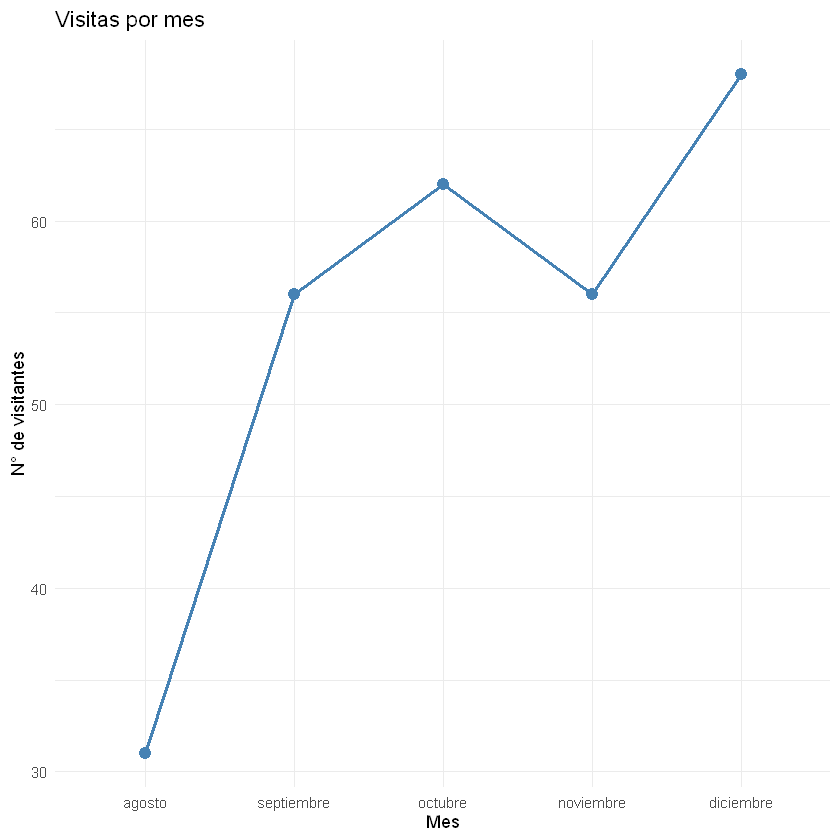

In [6]:
# --- Pregunta 2: Visitas por mes ---
analisis_pregunta_2 <- function(entradas_df) {
  conteo_mes <- entradas_df %>%
    mutate(fecha = dmy(fecha), mes = month(fecha), mes_nombre = month(fecha, label = TRUE, abbr = FALSE)) %>%
    count(mes, mes_nombre) %>%
    arrange(mes)
    
  p <- ggplot(conteo_mes, aes(x = mes_nombre, y = n, group = 1)) +
    geom_line(color = "steelblue", size=1) + geom_point(size = 3, color = "steelblue") +
    labs(title = "Visitas por mes", x = "Mes", y = "N° de visitantes") +
    theme_minimal()
    
  return(list(plot = p, data = conteo_mes))
}

resultado_p2 <- analisis_pregunta_2(entradas_limpio)

resultado_p2$data
resultado_p2$plot

[1] "--- Datos de Distribución de Tipos de Hábitat ---"


tipo_ambiente,n,prop,ypos,label_texto
<chr>,<int>,<dbl>,<dbl>,<chr>
Abierto,4,0.2222222,0.8888889,22%
Cerrado,9,0.5000000,0.5277778,50%
Mixto,5,0.2777778,0.1388889,28%


[1] "--- Datos de Visitas por Hábitat ---"


nombre_habitat,n
<chr>,<int>
Altas Cumbres,16
Bosque Templado,16
Bosque de Koalas,18
Caverna de los Murciélagos,25
Desierto Rojo,36
Estepa Salvaje,14
Granja Interactiva,9
Isla de los Primates,10
Jardín de las Mariposas,9


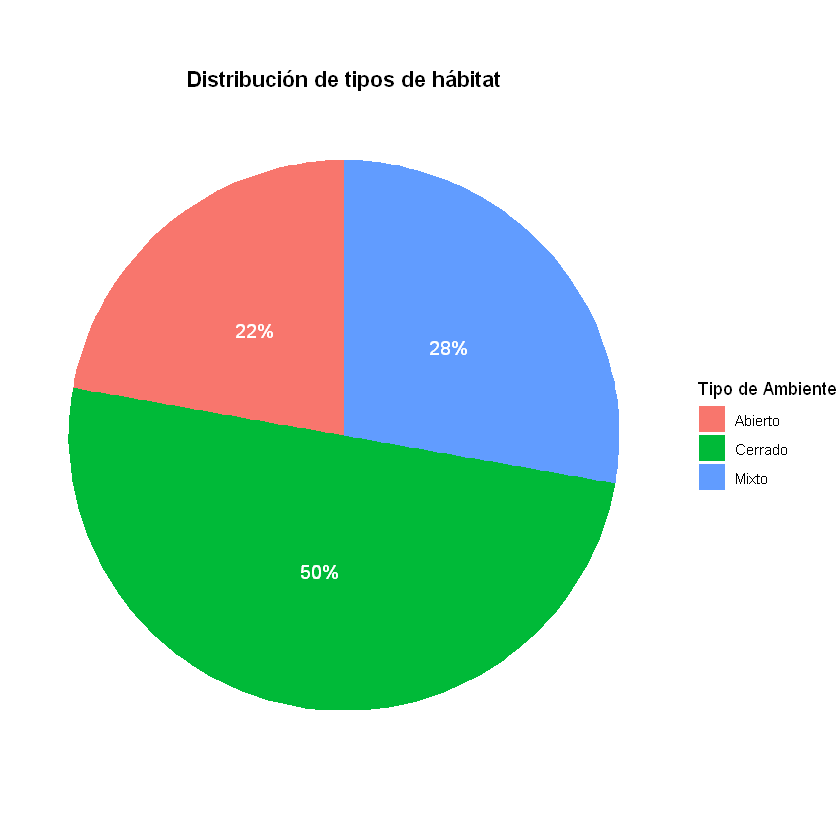

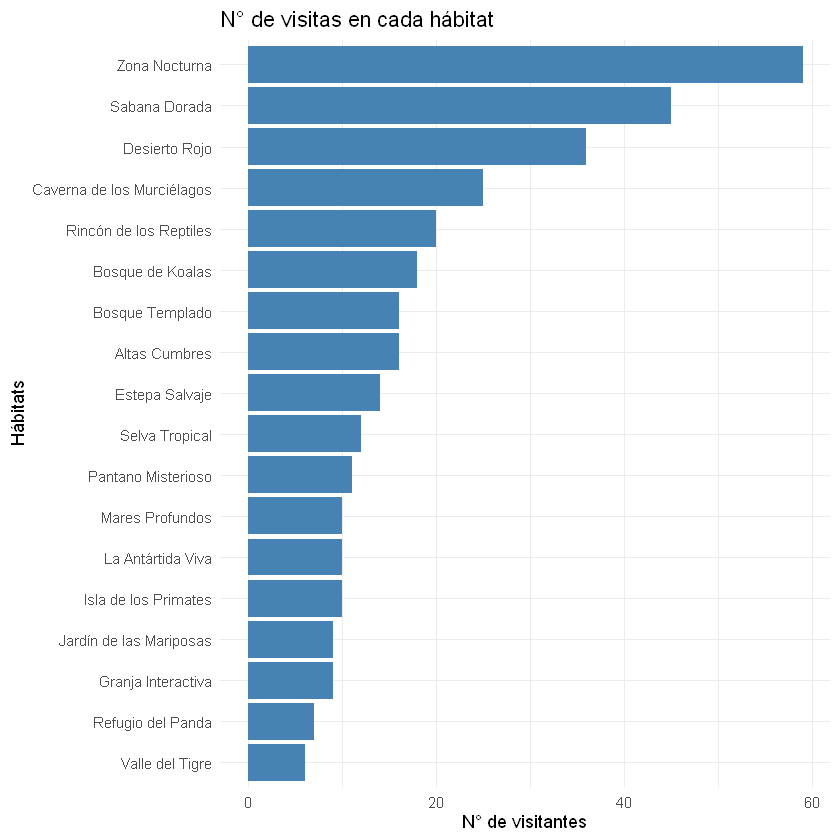

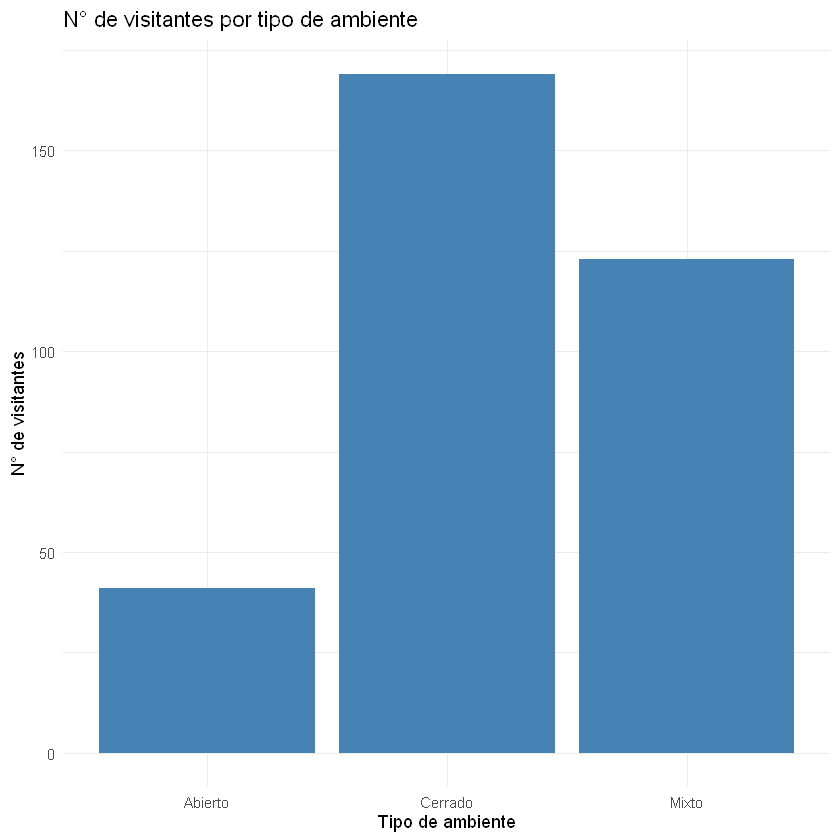

In [7]:
# --- Pregunta 3: Análisis de Hábitats ---
analisis_pregunta_3 <- function(entradas_habitats_df, habitats_df) {
  # Pie chart de tipos de ambiente
  conteo_para_pie <- habitats_df %>%
    count(tipo_ambiente) %>%
    mutate(prop = n / sum(n), ypos = 1 - (cumsum(n) - 0.5 * n) / sum(n), label_texto = paste0(round(prop * 100, 0), "%"))
  
  p1 <- ggplot(conteo_para_pie, aes(x = "", y = prop, fill = tipo_ambiente)) +
    geom_col(width = 1) + coord_polar("y", start = 0) +
    geom_text(aes(y = ypos, label = label_texto), color = "white", size = 4) +
    labs(title = "Distribución de tipos de hábitat", fill = "Tipo de Ambiente") +
    theme_void() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))

  # Bar chart de visitas por hábitat
  left_join_df <- left_join(entradas_habitats_df, habitats_df, by = "ID_habitat")
  conteo_visitas_habitat <- left_join_df %>% count(nombre_habitat)
  
  p2 <- ggplot(conteo_visitas_habitat, aes(x = n, y = reorder(nombre_habitat, n))) +
    geom_col(fill = "steelblue") +
    labs(title = "N° de visitas en cada hábitat", x = "N° de visitantes", y = "Hábitats") +
    theme_minimal()
    
  # Bar chart de visitas por tipo de ambiente
  conteo_visitas_ambiente <- left_join_df %>% count(tipo_ambiente)
  p3 <- ggplot(conteo_visitas_ambiente, aes(x = tipo_ambiente, y = n)) +
    geom_col(fill = "steelblue") +
    labs(title = "N° de visitantes por tipo de ambiente", x = "Tipo de ambiente", y = "N° de visitantes") +
    theme_minimal()
    
  return(list(plots = list(distribucion_tipos = p1, visitas_por_habitat = p2, visitas_por_ambiente = p3),
              data = list(distribucion_tipos = conteo_para_pie, visitas_por_habitat = conteo_visitas_habitat, visitas_por_ambiente = conteo_visitas_ambiente)))
}

resultado_p3 <- analisis_pregunta_3(entradas_habitats_limpio, habitats_limpio)

print("--- Datos de Distribución de Tipos de Hábitat ---")
resultado_p3$data$distribucion_tipos
print("--- Datos de Visitas por Hábitat ---")
resultado_p3$data$visitas_por_habitat

resultado_p3$plots$distribucion_tipos
resultado_p3$plots$visitas_por_habitat
resultado_p3$plots$visitas_por_ambiente

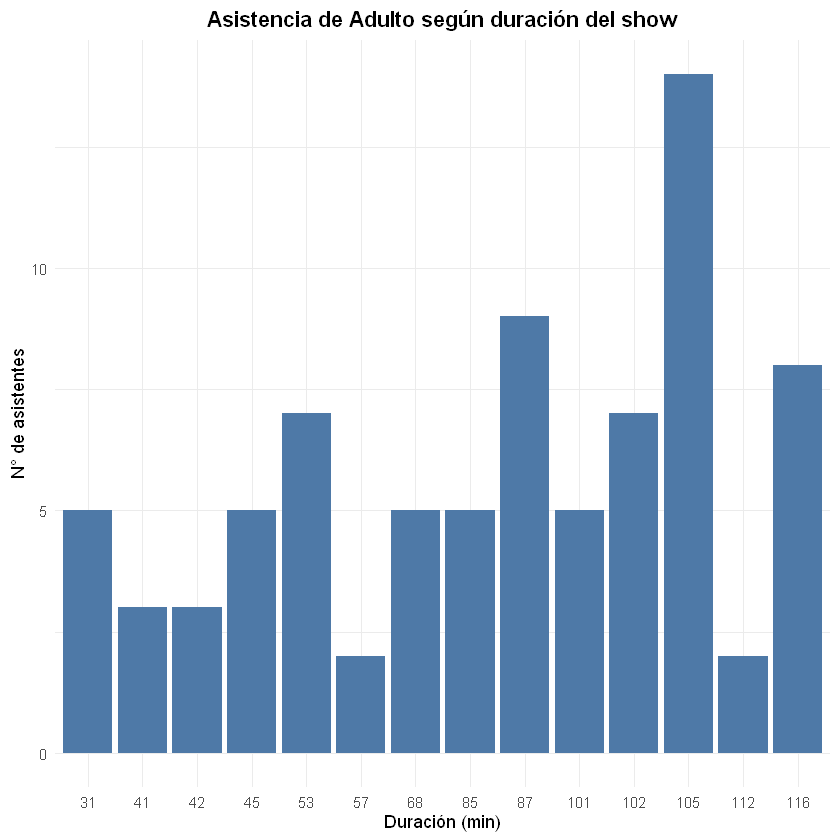

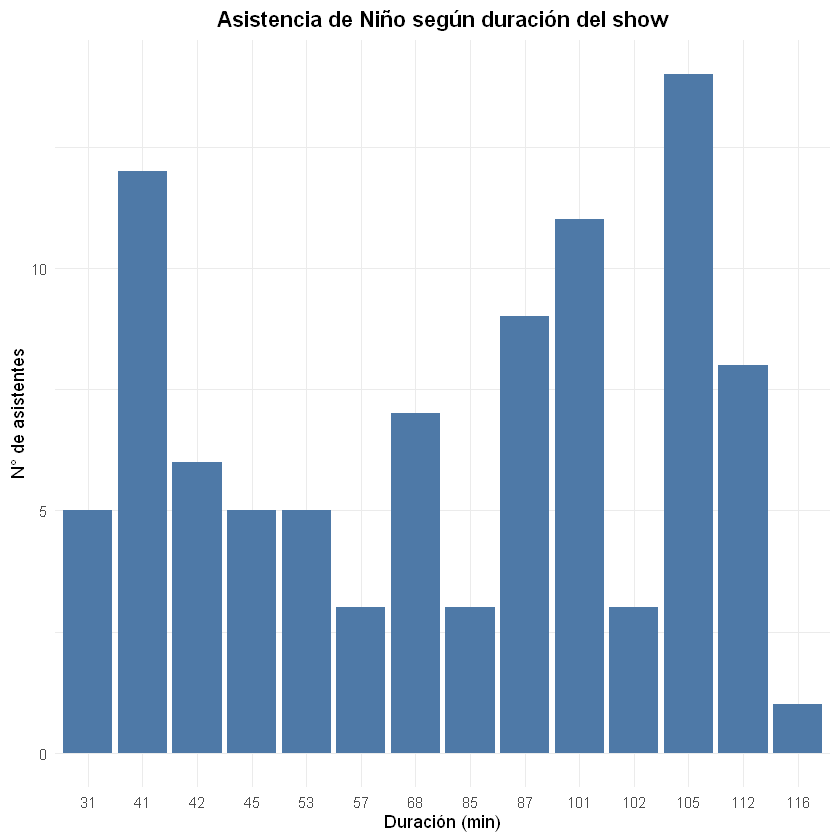

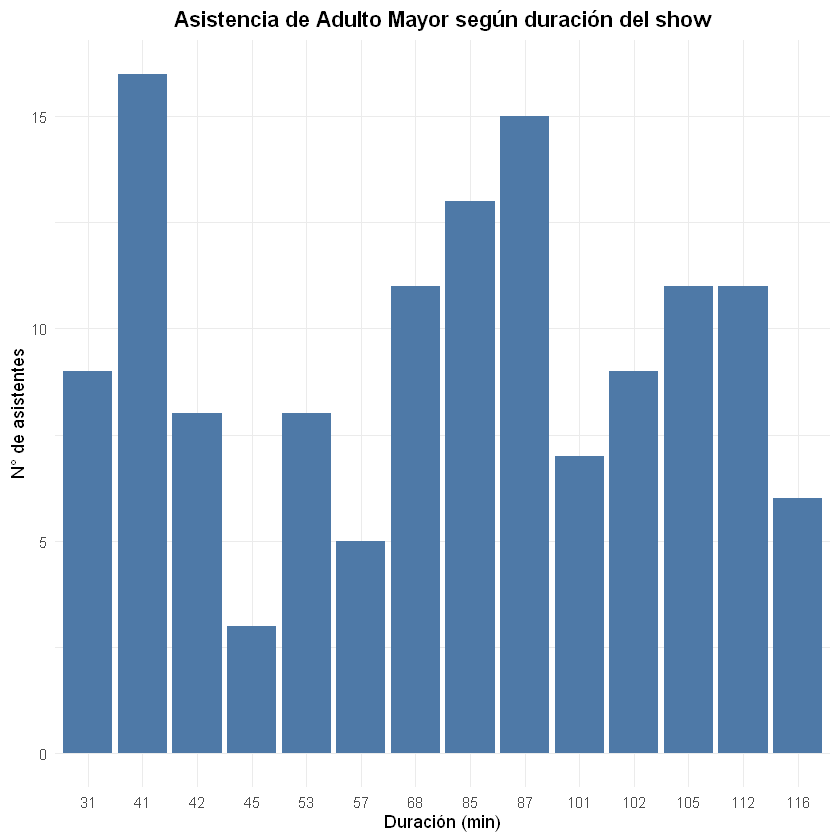

In [8]:
# --- Pregunta 4: Duración de shows por rango etario ---
analisis_pregunta_4 <- function(entradas_shows_df, shows_df, entradas_df) {
  plots <- list()
  full_df <- left_join(entradas_shows_df, shows_df, by = "ID_show") %>%
    left_join(select(entradas_df, ID_entrada, rango_etario), by = "ID_entrada")
    
  for (rango in unique(full_df$rango_etario)) {
    if(is.na(rango)) next
    datos_filtrados <- full_df %>%
      filter(rango_etario == rango & duracion != "NULL") %>%
      mutate(duracion = as.numeric(duracion))
    
    p <- ggplot(datos_filtrados, aes(x = reorder(factor(duracion), duracion))) +
      geom_bar(fill = "#4e79a7") +
      labs(title = paste("Asistencia de", rango, "según duración del show"), x = "Duración (min)", y = "N° de asistentes") +
      theme_minimal() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))
      
    plots[[rango]] <- p
  }
  return(list(plots = plots))
}

resultado_p4 <- analisis_pregunta_4(entradas_shows_limpio, shows, entradas_limpio)

resultado_p4$plots$Adulto
resultado_p4$plots$Niño
resultado_p4$plots$`Adulto Mayor`

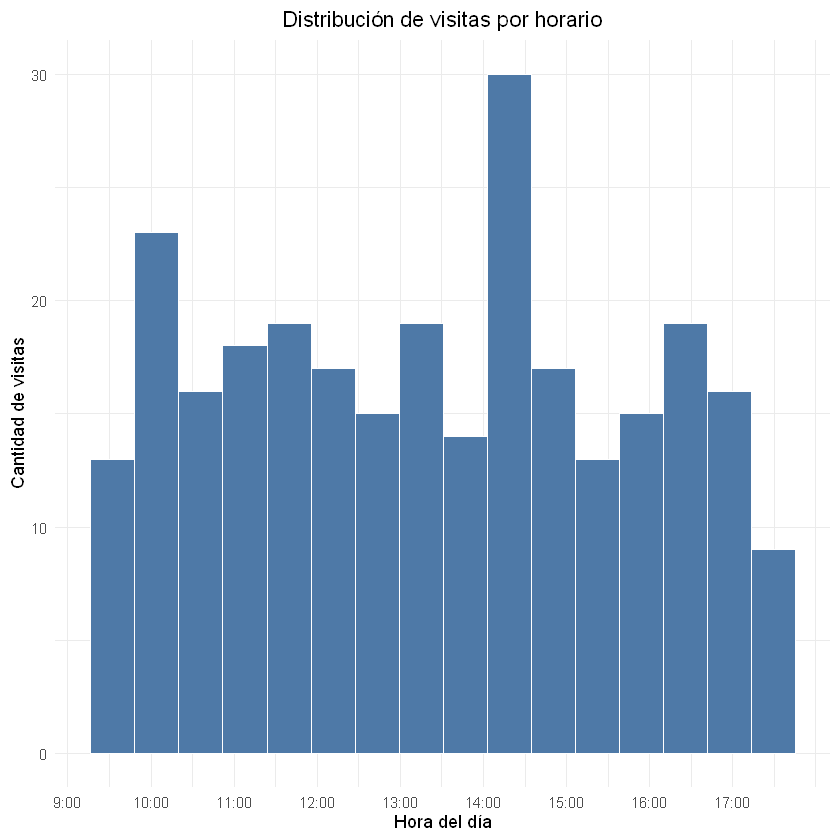

In [9]:
# --- Pregunta 5: Distribución de visitas por horario ---
analisis_pregunta_5 <- function(entradas_df) {
  entradas_con_hora <- entradas_df %>%
    mutate(hora_parsed = hm(hora_ingreso), hora_decimal = hour(hora_parsed) + minute(hora_parsed) / 60)
    
  p <- ggplot(entradas_con_hora, aes(x = hora_decimal)) +
    geom_histogram(bins = 16, fill = "#4e79a7", color = "white") +
    scale_x_continuous(breaks = 9:17, labels = paste0(9:17, ":00")) +
    labs(title = "Distribución de visitas por horario", x = "Hora del día", y = "Cantidad de visitas") +
    theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
    
  return(list(plot = p, data = select(entradas_con_hora, ID_entrada, hora_decimal)))
}

resultado_p5 <- analisis_pregunta_5(entradas_limpio)

resultado_p5$plot

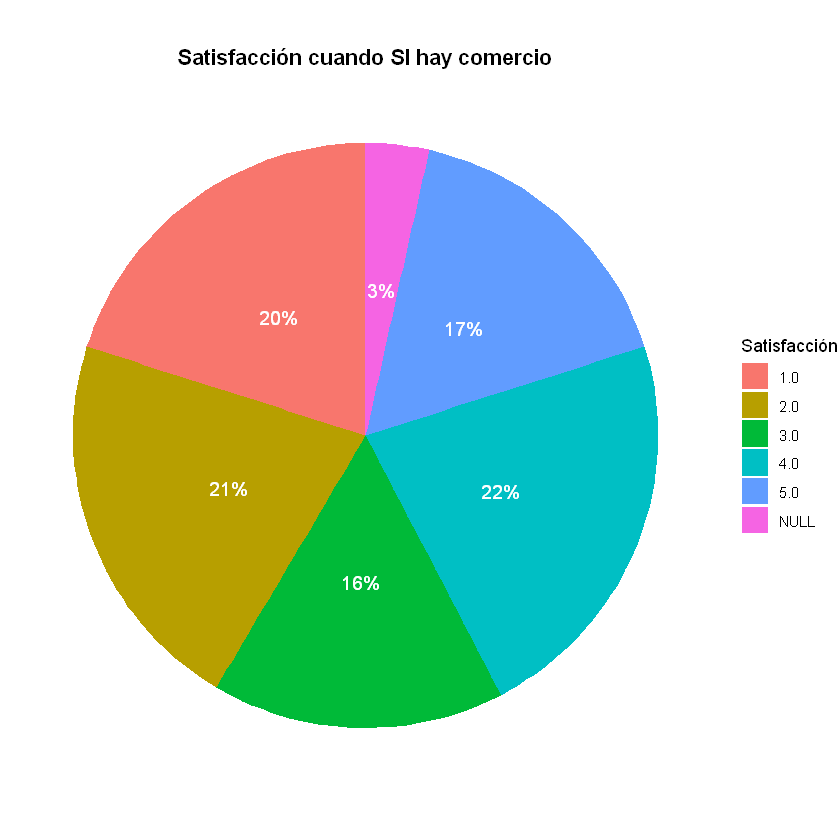

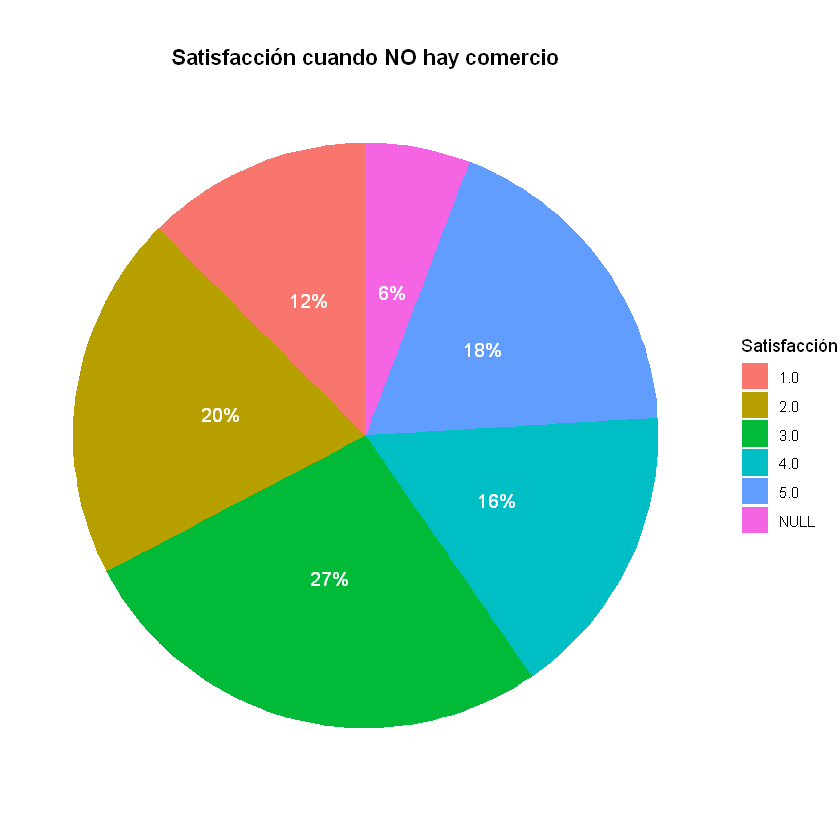

In [10]:
# --- Pregunta 6: Satisfacción vs. Comercios en Hábitats ---
analisis_pregunta_6 <- function(entradas_habitats_df, habitats_df) {
  plots <- list()
  full_df <- left_join(entradas_habitats_df, habitats_df, by = "ID_habitat")

  for (comercio_valor in unique(full_df$comercio)) {
    if(is.na(comercio_valor)) next
    conteo_satisfaccion <- full_df %>%
      filter(comercio == comercio_valor) %>%
      mutate(satisfaccion_str = if_else(is.na(as.character(satisfaccion)), "No responde", as.character(satisfaccion))) %>%
      count(satisfaccion_str, name = "n") %>%
      mutate(prop = n / sum(n), ypos = 1 - (cumsum(n) - 0.5 * n) / sum(n))
      
    titulo_comercio <- if (comercio_valor) "SI" else "NO"
    
    p <- ggplot(conteo_satisfaccion, aes(x = "", y = prop, fill = satisfaccion_str)) +
      geom_col(width = 1) + coord_polar(theta = "y") +
      geom_text(aes(y = ypos, label = paste0(round(prop * 100, 0), "%")), color = "white", size = 4) +
      labs(title = paste("Satisfacción cuando", titulo_comercio, "hay comercio"), fill = "Satisfacción") +
      theme_void() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))
      
    plots[[titulo_comercio]] <- p
  }
  return(list(plots = plots))
}

resultado_p6 <- analisis_pregunta_6(entradas_habitats_limpio, habitats_limpio)

resultado_p6$plots$SI
resultado_p6$plots$NO

permite_alimentos_label,cantidad_visitas
<chr>,<int>
No Permite,168
Sí Permite,165


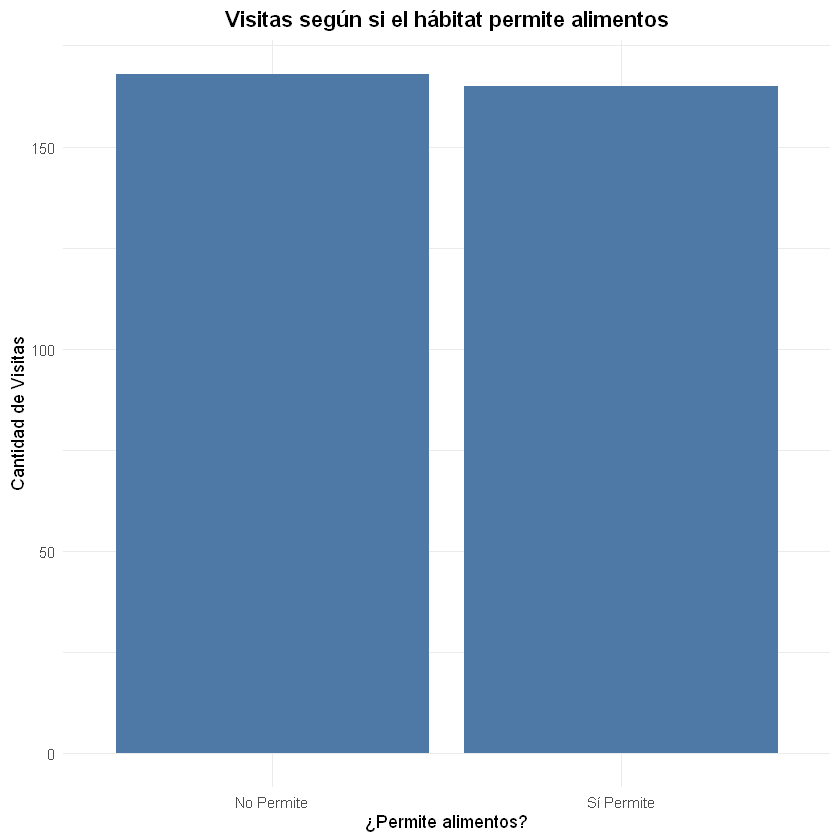

In [11]:
# --- Pregunta 7: Visitas vs. Permiso de Alimentos ---
analisis_pregunta_7 <- function(entradas_habitats_df, habitats_df) {
  full_df <- left_join(entradas_habitats_df, habitats_df, by = "ID_habitat")
  
  datos_visitas <- full_df %>%
    mutate(permite_alimentos_label = case_when(
        permite_alimentos %in% c("True", "true")   ~ "Sí Permite",
        permite_alimentos %in% c("False", "false") ~ "No Permite",
        TRUE                                      ~ "No Especificado"
      )) %>%
    count(permite_alimentos_label, name = "cantidad_visitas")
    
  p <- ggplot(datos_visitas, aes(x = permite_alimentos_label, y = cantidad_visitas)) +
    geom_col(fill = "#4e79a7") +
    labs(title = "Visitas según si el hábitat permite alimentos", x = "¿Permite alimentos?", y = "Cantidad de Visitas") +
    theme_minimal() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    
  return(list(plot = p, data = datos_visitas))
}

resultado_p7 <- analisis_pregunta_7(entradas_habitats_limpio, habitats_limpio)

resultado_p7$data
resultado_p7$plot

Warning message:
"There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `cupos_ocupados = as.numeric(cupos_ocupados)`.
Caused by warning:
! NAs introducidos por coerción
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings."


[1] -0.06179585

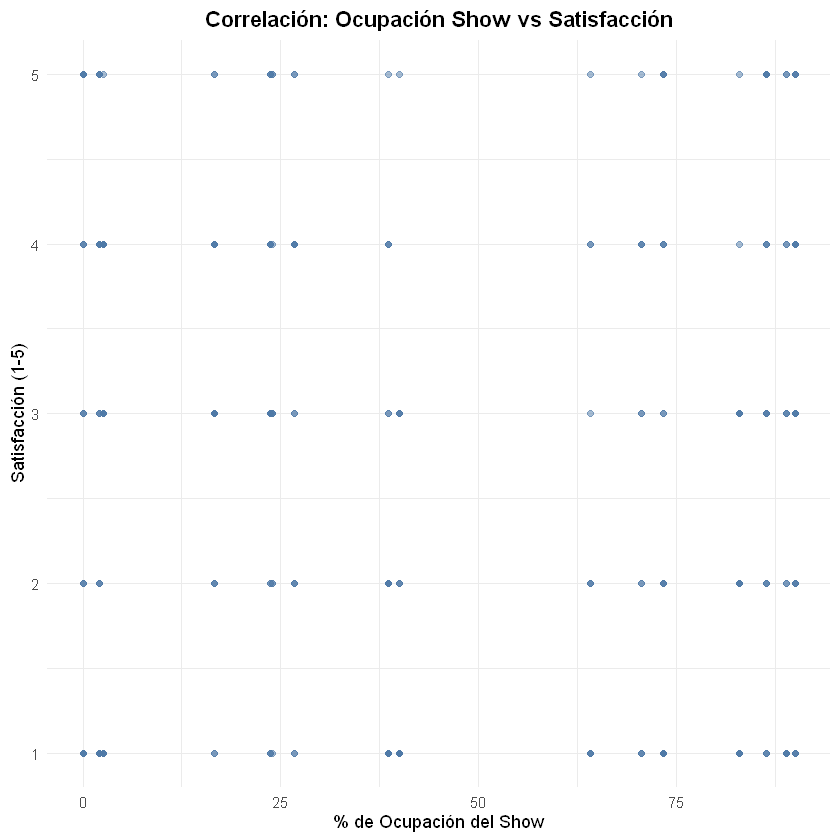

In [12]:
# --- Pregunta 8: Correlación Ocupación de Show vs. Satisfacción ---
analisis_pregunta_8 <- function(entradas_shows_df, shows_df) {
  data_q8 <- left_join(entradas_shows_df, shows_df, by = "ID_show") %>%
    mutate(
      cupos_ocupados = as.numeric(cupos_ocupados), cupos_totales = as.numeric(cupos_totales),
      satisfaccion = as.numeric(satisfaccion),
      porcentaje_ocupacion = if_else(cupos_totales > 0, (cupos_ocupados / cupos_totales) * 100, 0.0)
    ) %>%
    drop_na(satisfaccion, porcentaje_ocupacion)
    
  correlation <- cor(data_q8$porcentaje_ocupacion, data_q8$satisfaccion)
  
  p <- ggplot(data_q8, aes(x = porcentaje_ocupacion, y = satisfaccion)) +
    geom_point(alpha = 0.5, color = "#4e79a7") +
    labs(title = "Correlación: Ocupación Show vs Satisfacción", x = "% de Ocupación del Show", y = "Satisfacción (1-5)") +
    theme_minimal() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))

  return(list(plot = p, correlation = correlation, data = data_q8))
}

resultado_p8 <- analisis_pregunta_8(entradas_shows_limpio, shows)

resultado_p8$correlation
resultado_p8$plot

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `satisfaccion = as.numeric(satisfaccion)`.
Caused by warning:
! NAs introducidos por coerción"


[1] 0.02252661

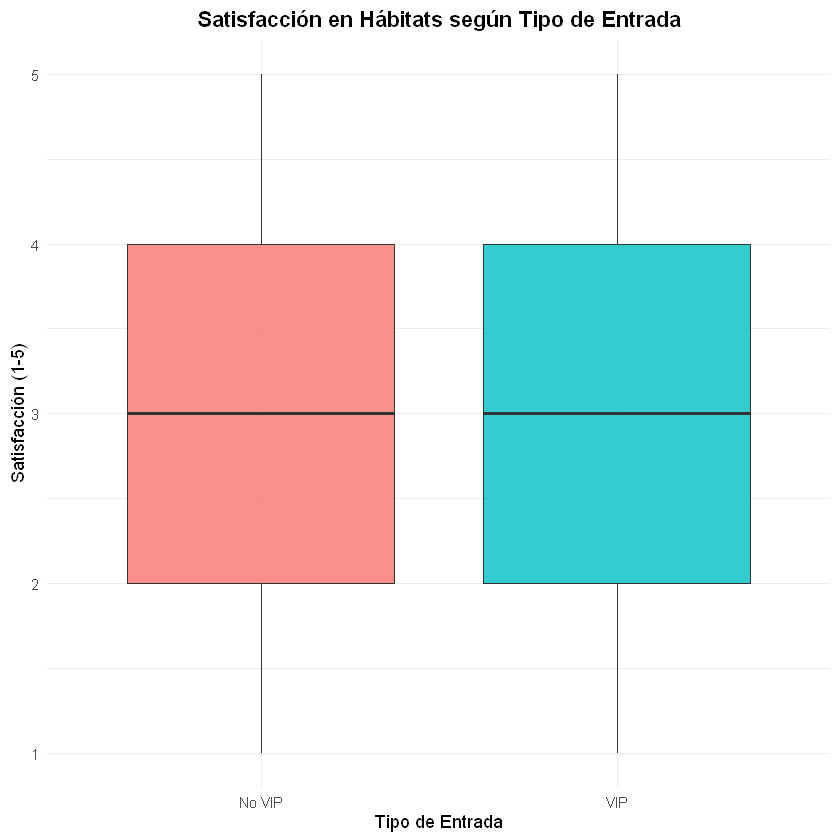

In [13]:
# --- Pregunta 9: Satisfacción en Hábitats vs. Entrada VIP ---
analisis_pregunta_9 <- function(entradas_habitats_df, entradas_df) {
  data_q9 <- left_join(entradas_habitats_df, select(entradas_df, ID_entrada, VIP), by = "ID_entrada") %>%
    mutate(
      satisfaccion = as.numeric(satisfaccion), VIP_str = tolower(as.character(VIP)),
      VIP_numeric = case_when(
        VIP_str %in% c("true", "si", "1", "1.0") ~ 1,
        VIP_str %in% c("false", "no", "0", "0.0") ~ 0
      ),
      VIP_label = if_else(VIP_numeric == 1, "VIP", "No VIP")
    ) %>%
    drop_na(satisfaccion, VIP_numeric)
    
  correlation <- cor(data_q9$VIP_numeric, data_q9$satisfaccion)
  
  p <- ggplot(data_q9, aes(x = VIP_label, y = satisfaccion, fill = VIP_label)) +
    geom_boxplot(alpha = 0.8) +
    labs(title = "Satisfacción en Hábitats según Tipo de Entrada", x = "Tipo de Entrada", y = "Satisfacción (1-5)") +
    theme_minimal() + theme(legend.position = "none", plot.title = element_text(hjust = 0.5, face = "bold"))
    
  return(list(plot = p, correlation = correlation, data = data_q9))
}

resultado_p9 <- analisis_pregunta_9(entradas_habitats_limpio, entradas_limpio)

resultado_p9$correlation
resultado_p9$plot

       Asistio_Show
VIP     FALSE TRUE
  False    36  109
  True     44   84

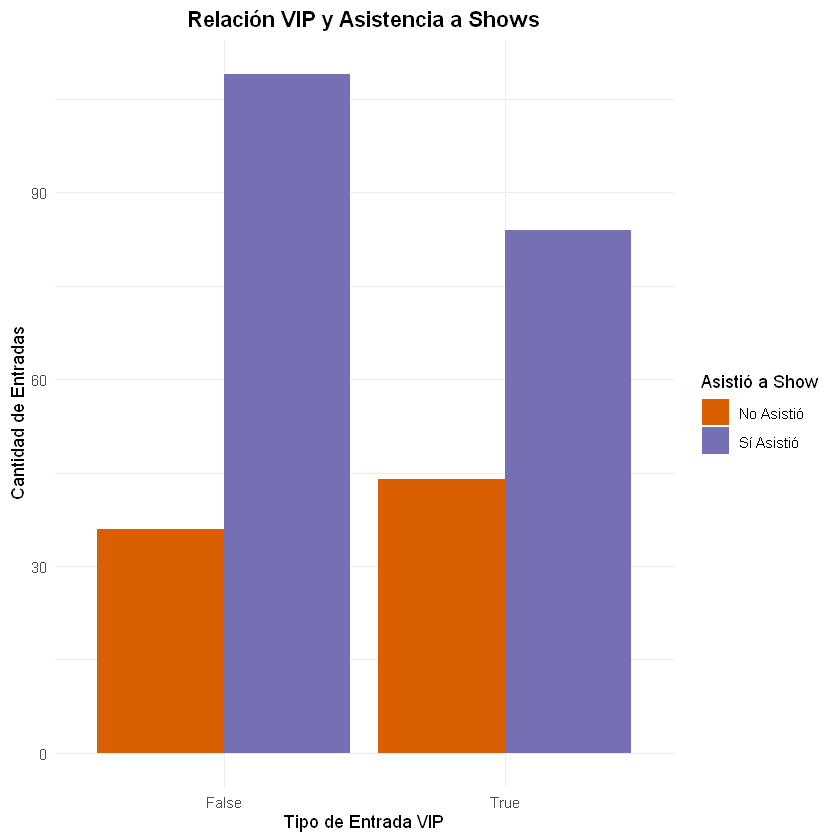

In [14]:
# --- Pregunta 10: Relación Entrada VIP vs. Asistencia a Shows ---
analisis_pregunta_10 <- function(entradas_df, entradas_shows_df) {
  ids_asistieron_shows <- unique(entradas_shows_df$ID_entrada)
  
  entradas_con_asistencia <- entradas_df %>%
    mutate(asistio_show = ID_entrada %in% ids_asistieron_shows)
    
  contingency_table <- table(VIP = entradas_con_asistencia$VIP, Asistio_Show = entradas_con_asistencia$asistio_show)
  
  p <- ggplot(entradas_con_asistencia, aes(x = as.factor(VIP), fill = as.factor(asistio_show))) +
    geom_bar(position = "dodge") +
    scale_fill_manual(name = "Asistió a Show", values = c("FALSE" = "#d95f02", "TRUE" = "#7570b3"), labels = c("No Asistió", "Sí Asistió")) +
    labs(title = "Relación VIP y Asistencia a Shows", x = "Tipo de Entrada VIP", y = "Cantidad de Entradas") +
    theme_minimal() + theme(plot.title = element_text(hjust = 0.5, face = "bold"))
    
  return(list(plot = p, data = contingency_table))
}

resultado_p10 <- analisis_pregunta_10(entradas_limpio, entradas_shows_limpio)

resultado_p10$data
resultado_p10$plot

[1] -0.2698767

ID_habitat,numero_visitas,cantidad_especies,nombre_habitat
<chr>,<int>,<int>,<chr>
H001,12,2,Selva Tropical
H002,45,1,Sabana Dorada
H003,25,4,Caverna de los Murciélagos
H004,11,4,Pantano Misterioso
H005,16,4,Bosque Templado
H006,20,2,Rincón de los Reptiles
H007,16,3,Altas Cumbres
H008,10,2,Mares Profundos
H009,10,2,Isla de los Primates


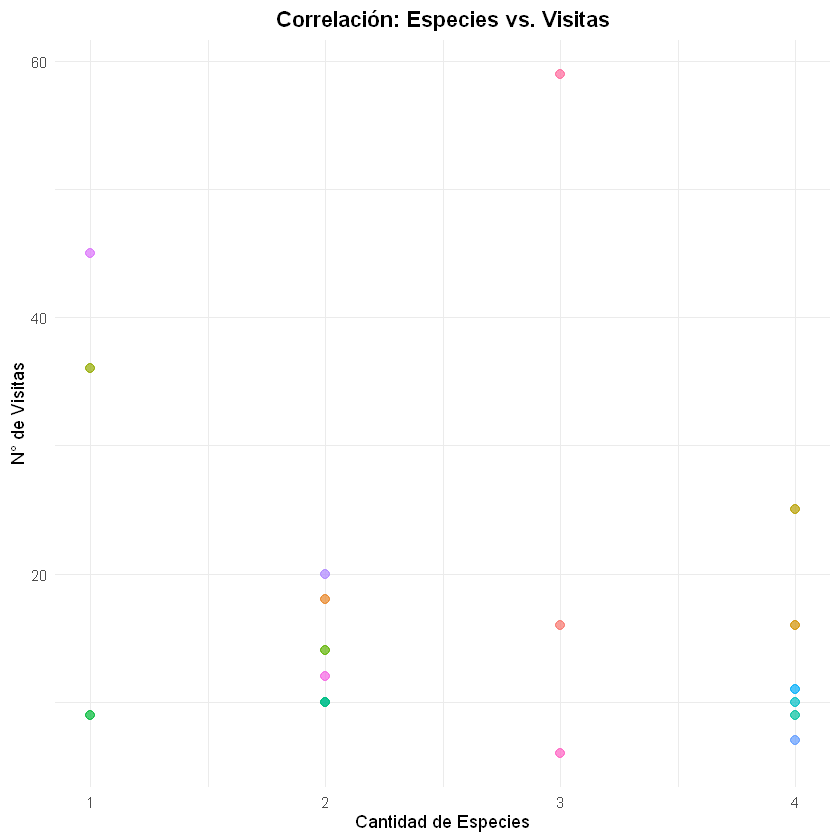

In [15]:

# --- Pregunta 11: Correlación Especies en Hábitat vs. Visitas ---
analisis_pregunta_11 <- function(entradas_habitats_df, habitats_df) {
  data_q11 <- entradas_habitats_df %>%
    count(ID_habitat, name = "numero_visitas") %>%
    left_join(select(habitats_df, ID_habitat, cantidad_especies, nombre_habitat), by = "ID_habitat") %>%
    drop_na(numero_visitas, cantidad_especies)
    
  correlation <- cor(data_q11$cantidad_especies, data_q11$numero_visitas)
  
  p <- ggplot(data_q11, aes(x = cantidad_especies, y = numero_visitas, color = nombre_habitat)) +
    geom_point(alpha = 0.7, size = 2.5) +
    labs(title = "Correlación: Especies vs. Visitas", x = "Cantidad de Especies", y = "N° de Visitas") +
    theme_minimal() + theme(legend.position = "none", plot.title = element_text(hjust = 0.5, face = "bold"))
    
  return(list(plot = p, correlation = correlation, data = data_q11))
}

resultado_p11 <- analisis_pregunta_11(entradas_habitats_limpio, habitats_limpio)

resultado_p11$correlation
resultado_p11$data
resultado_p11$plot

In [16]:
# Recopilacion de todos los resultados en una sola lista para exportar a excel
resultados_completos <- list(
  p1 = resultado_p1,
  p2 = resultado_p2,
  p3 = resultado_p3,
  p4 = resultado_p4,
  p5 = resultado_p5,
  p6 = resultado_p6,
  p7 = resultado_p7,
  p8 = resultado_p8,
  p9 = resultado_p9,
  p10 = resultado_p10,
  p11 = resultado_p11
)

## 🗂️ **Exportar Resultados a Excel con openxlsx**


[1] "--- Exportando resultados a Excel ---"
$Adulto

$Niño


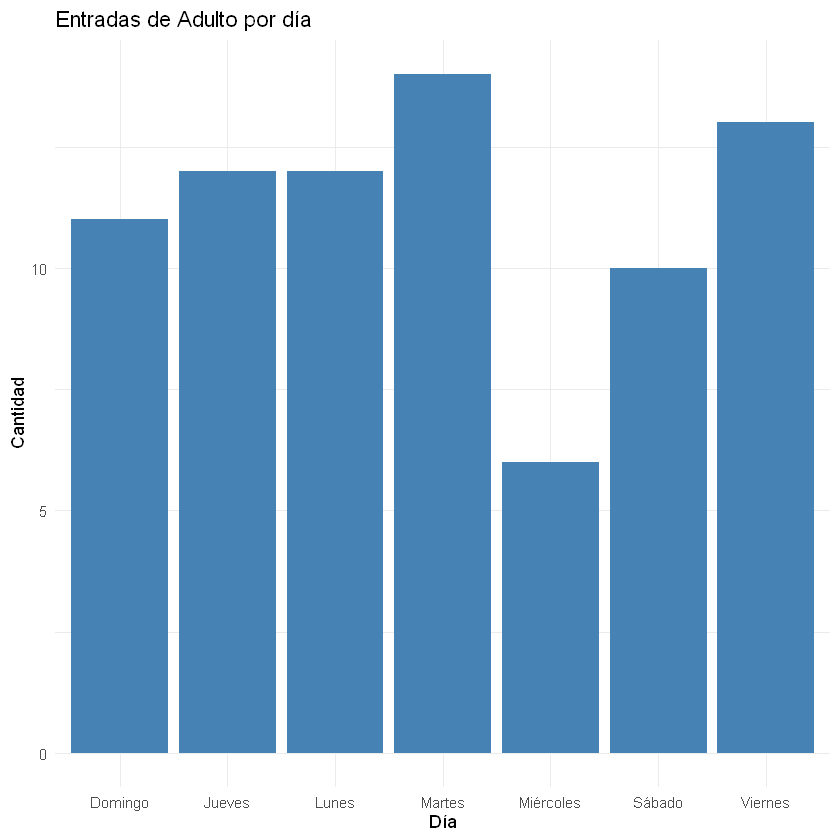


$`Adulto Mayor`


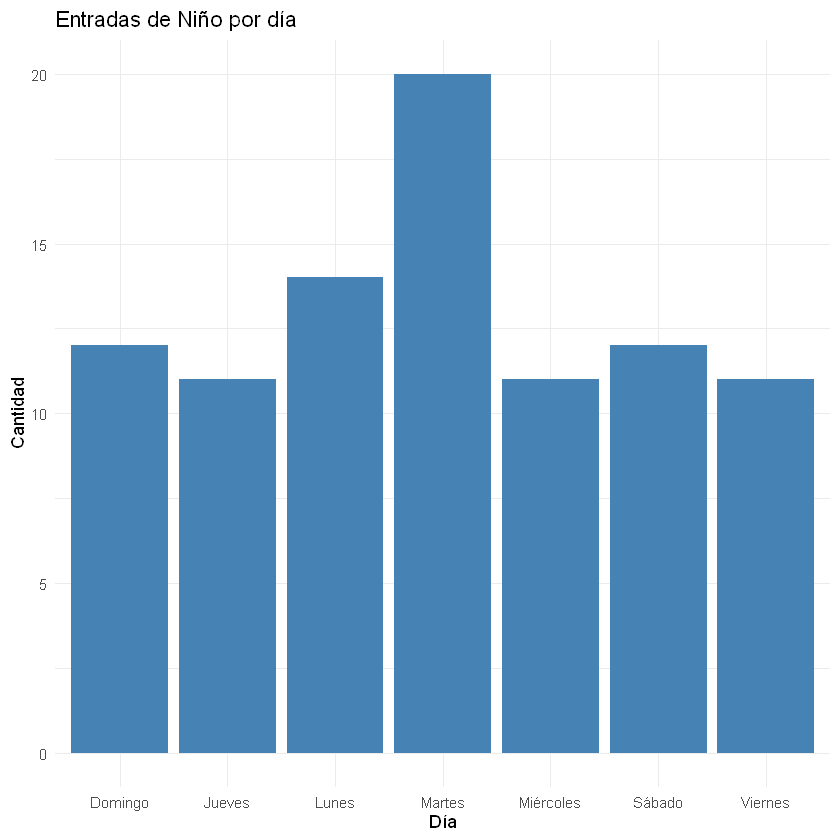

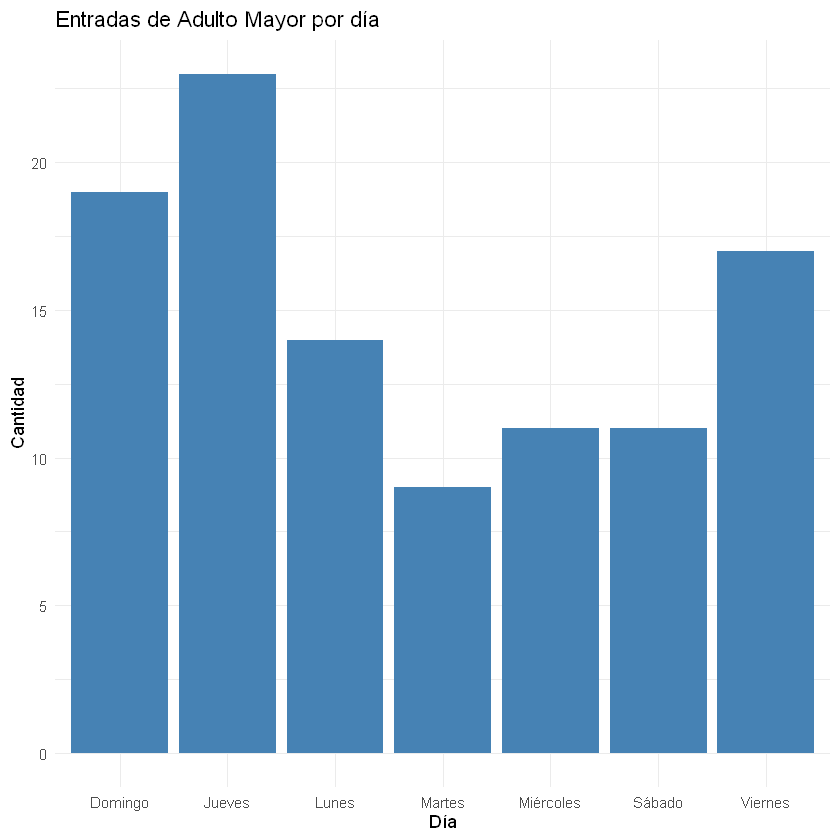

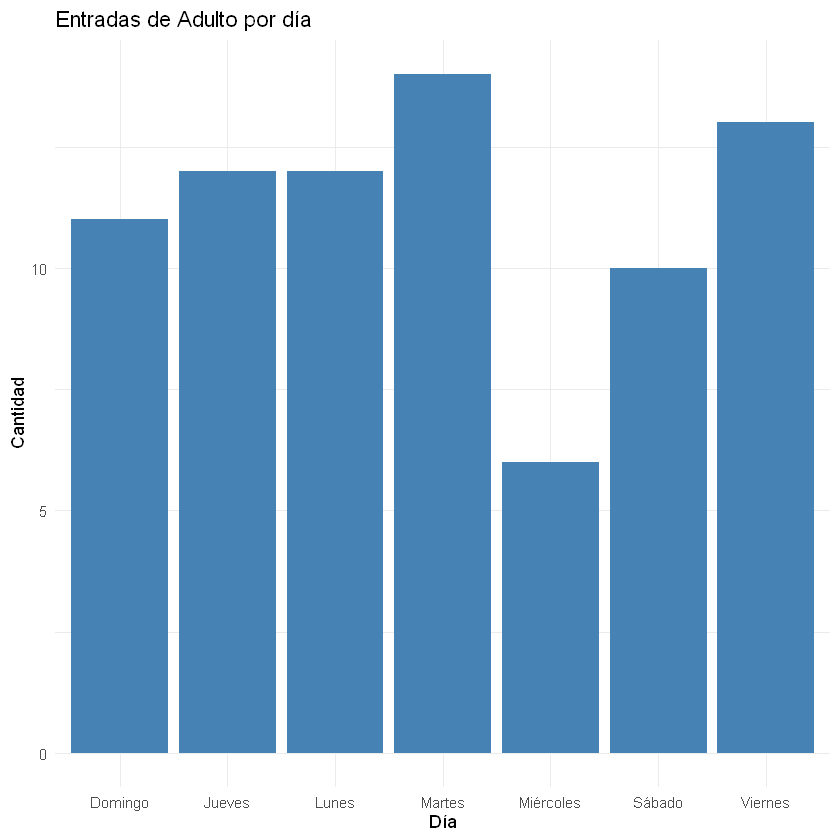

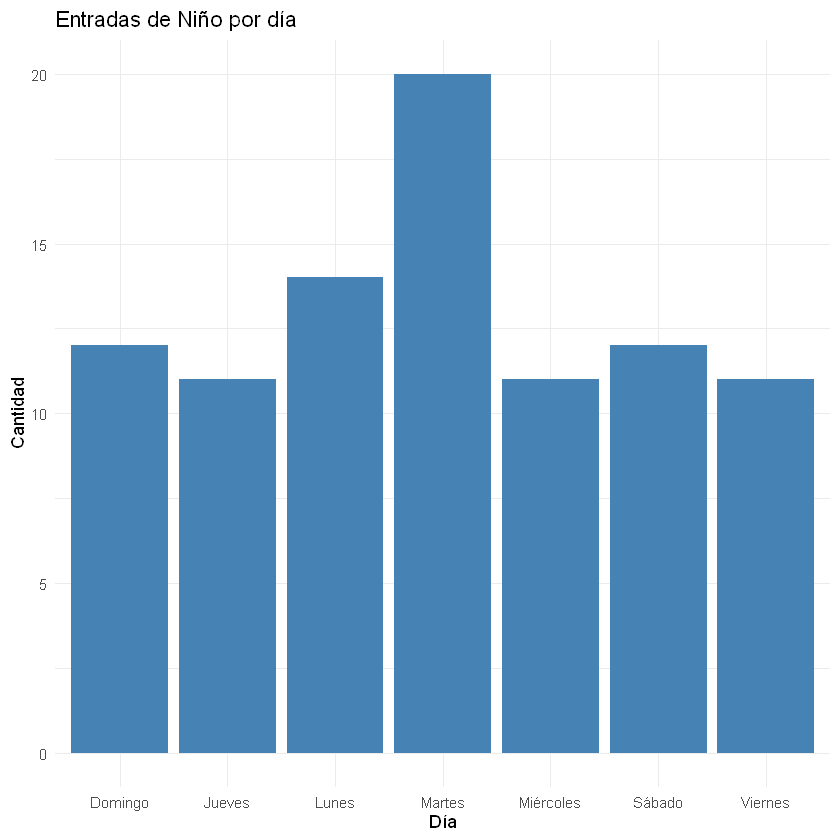

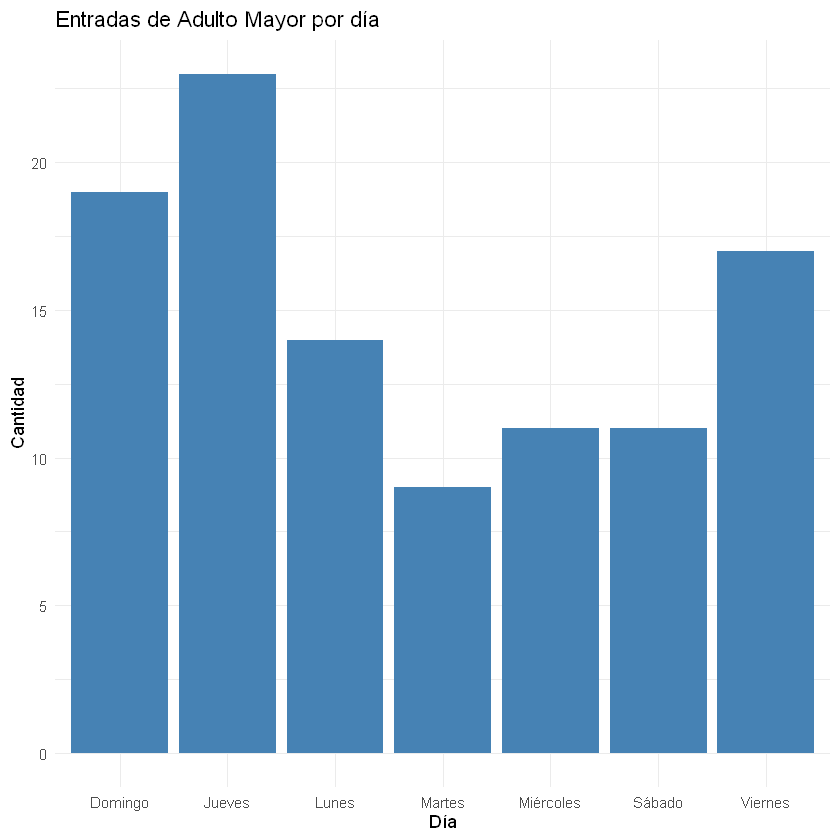

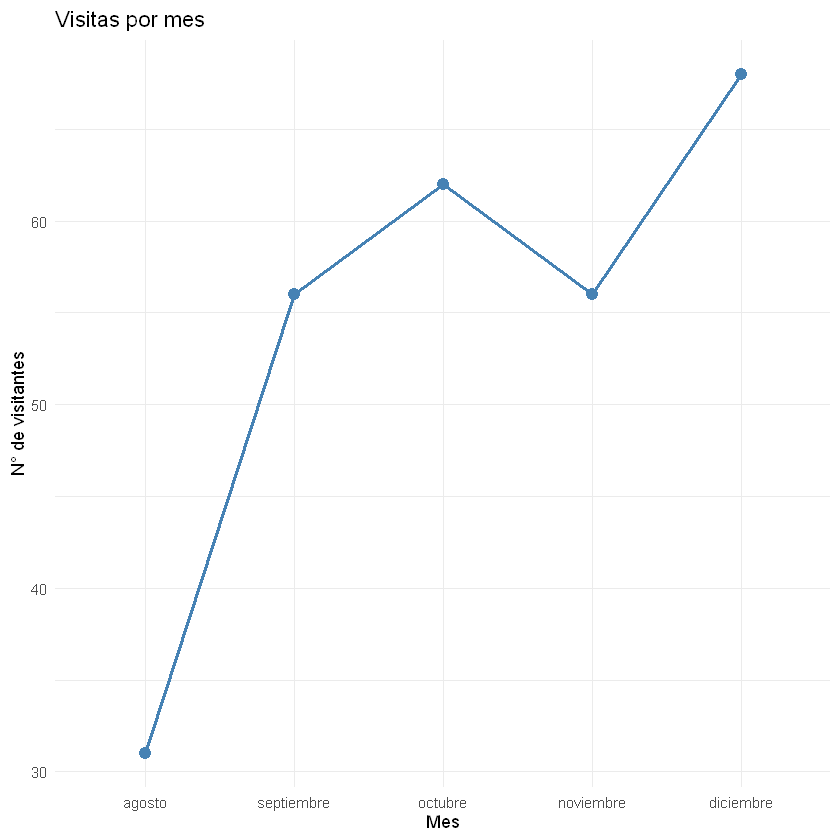

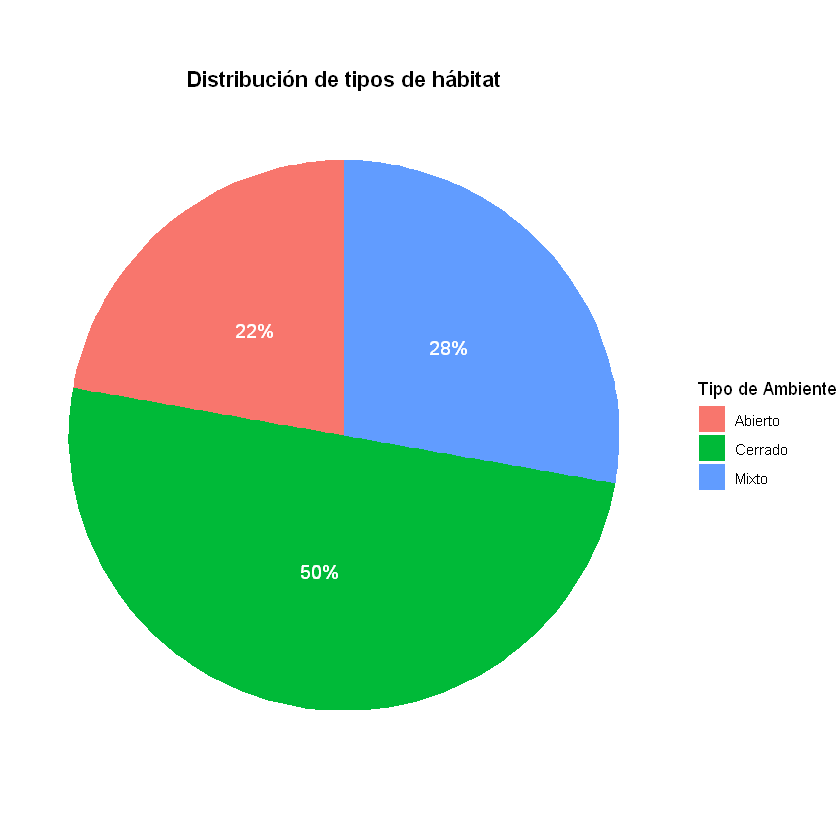

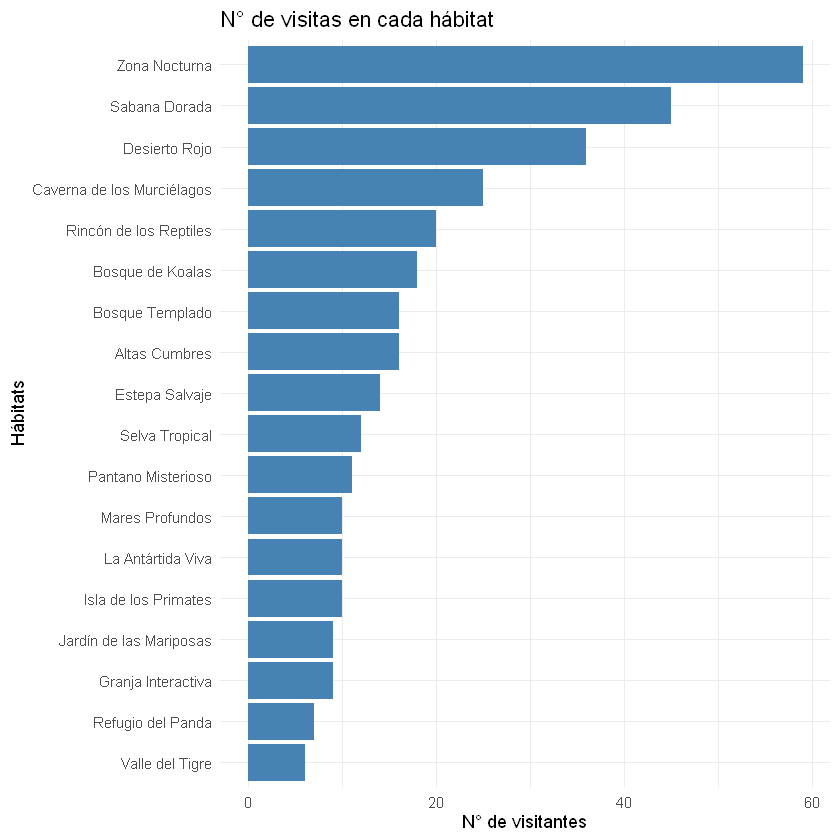

$Niño


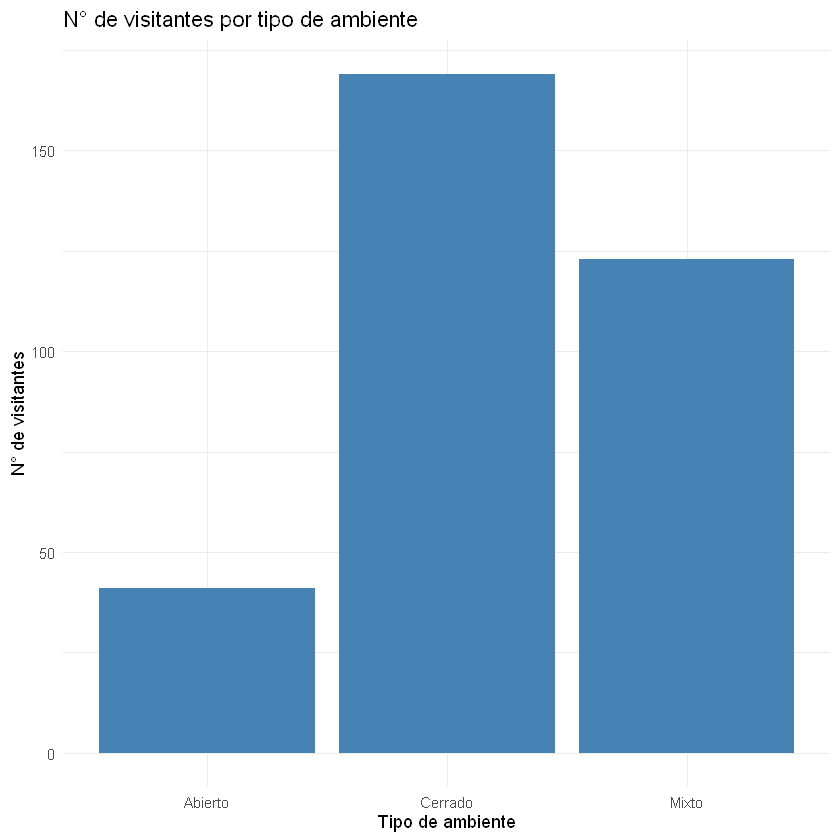


$`Adulto Mayor`


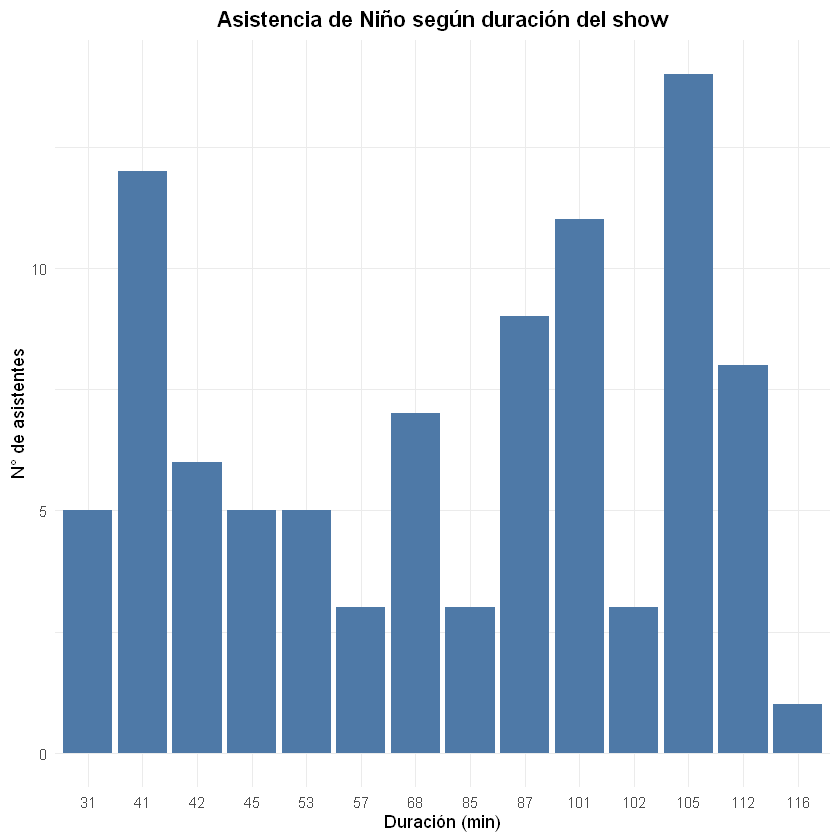


$Adulto


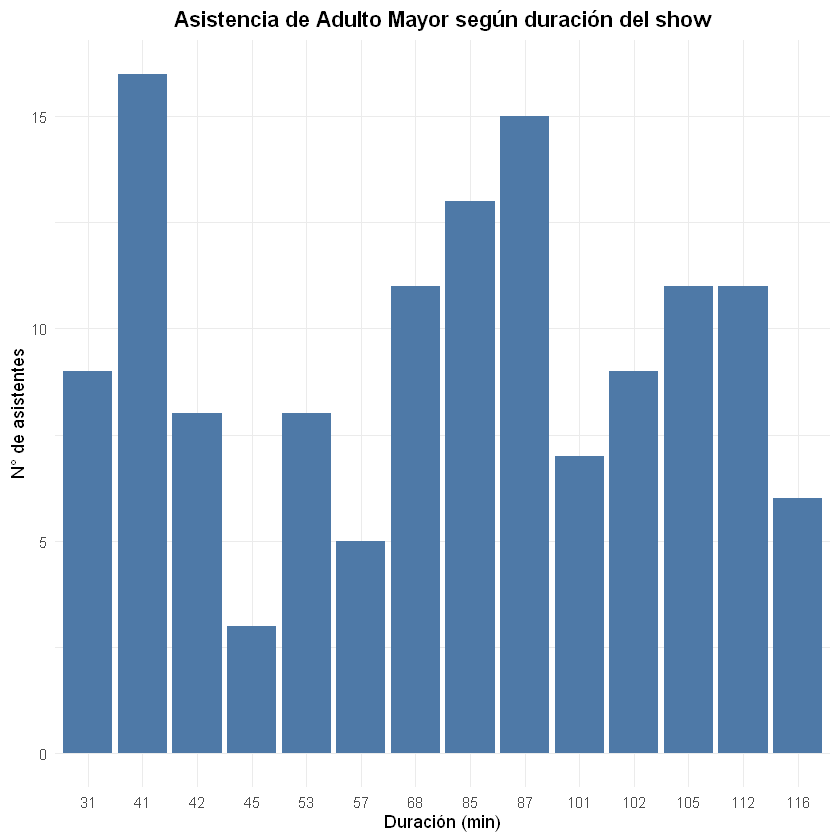

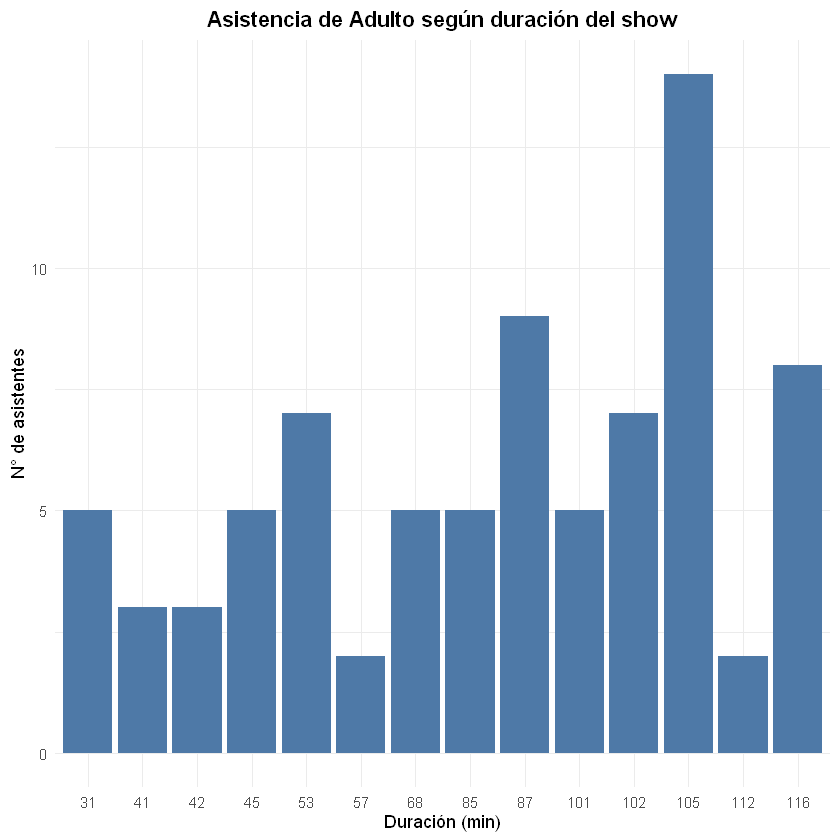

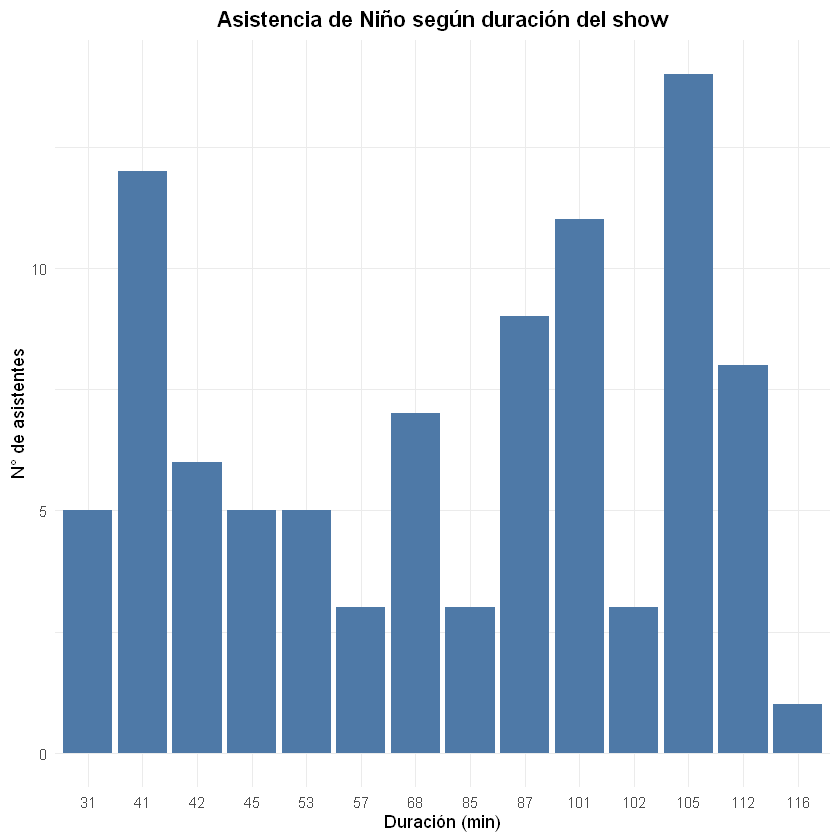

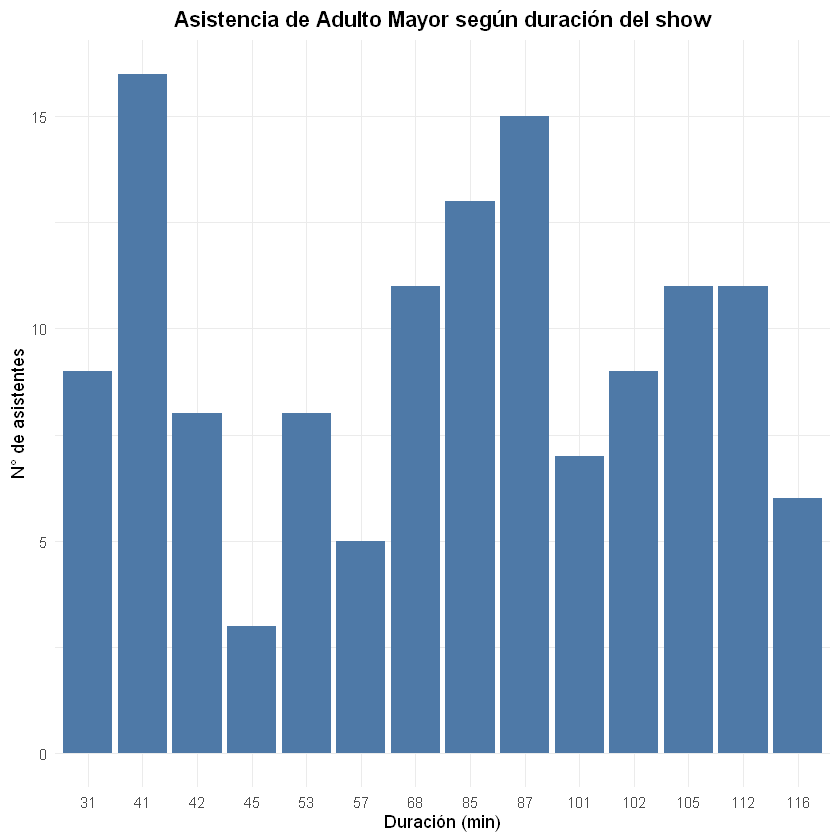

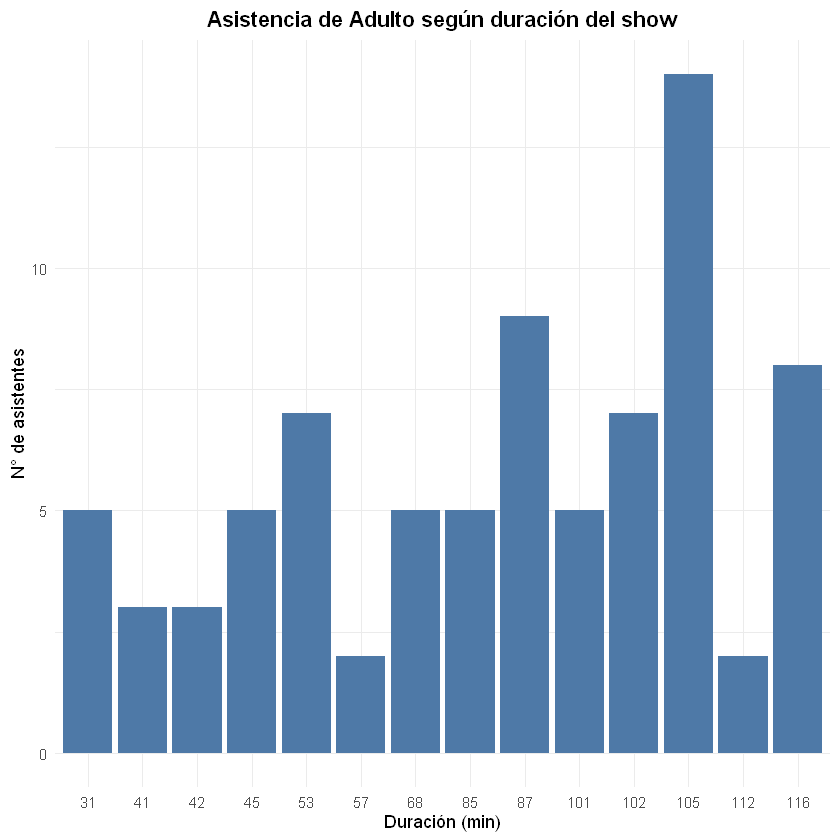

$SI


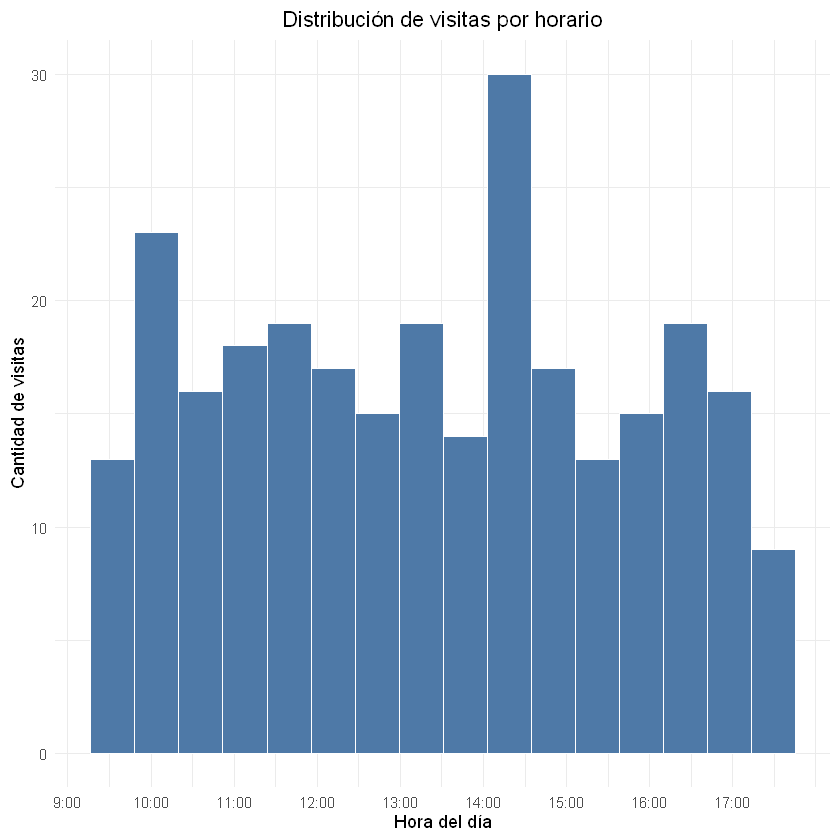


$NO


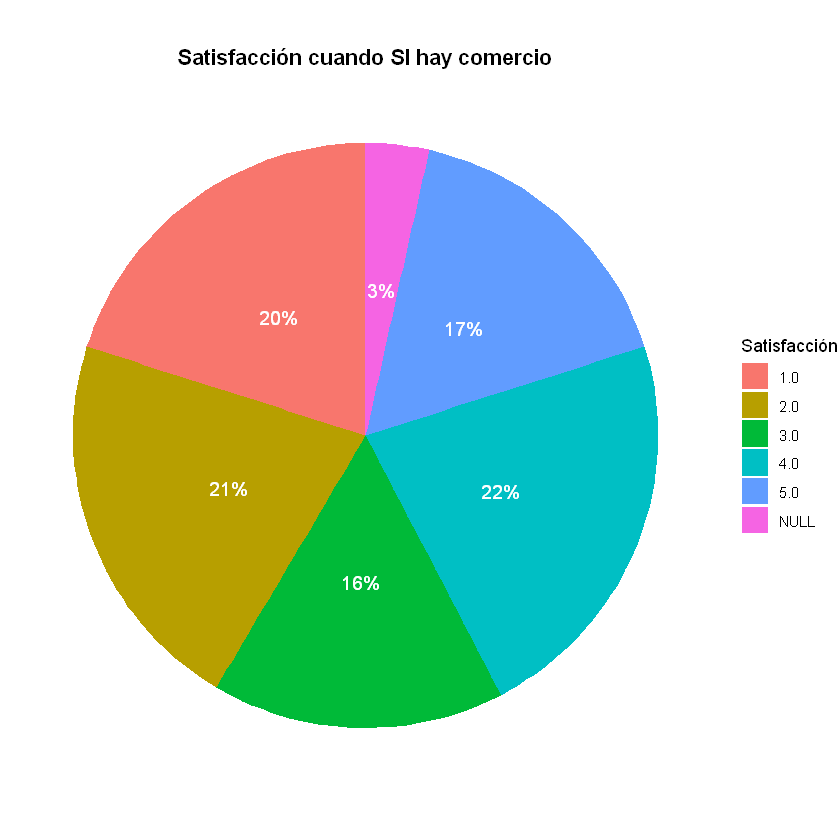

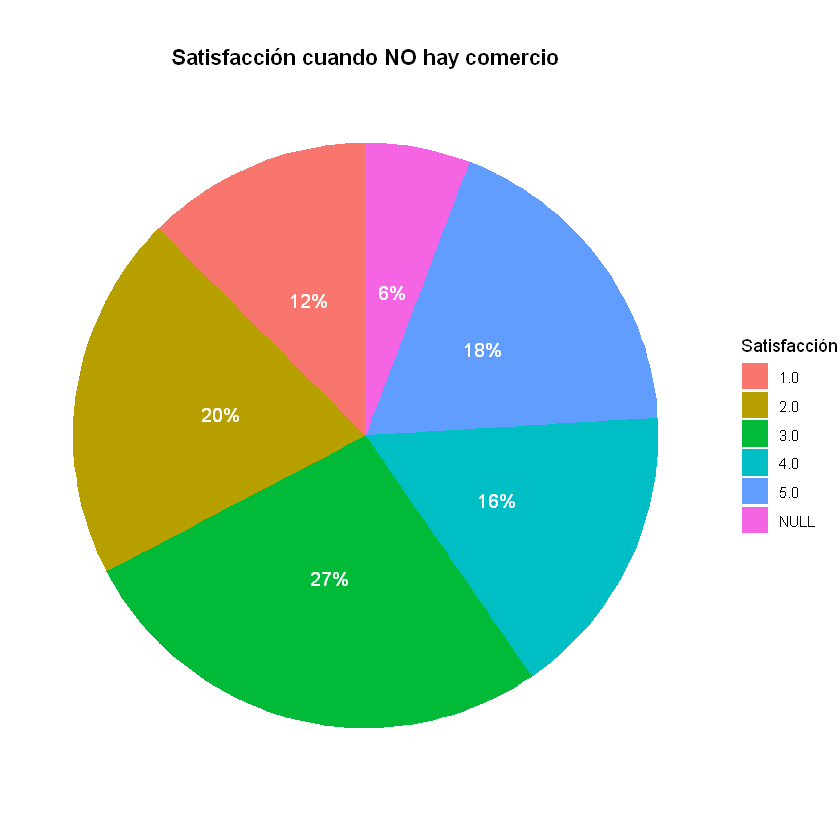

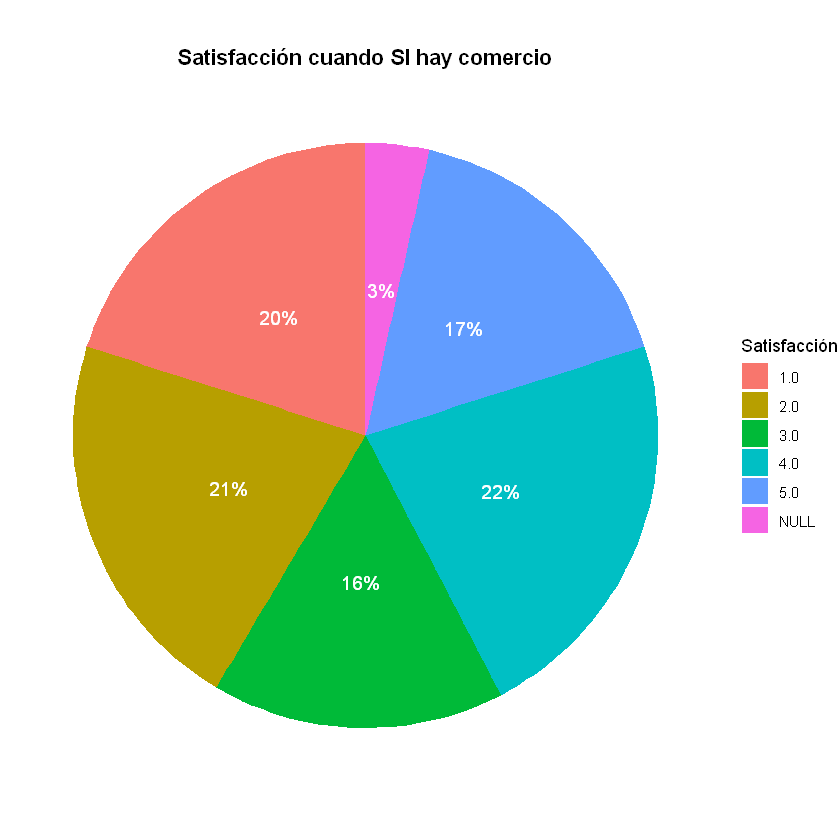

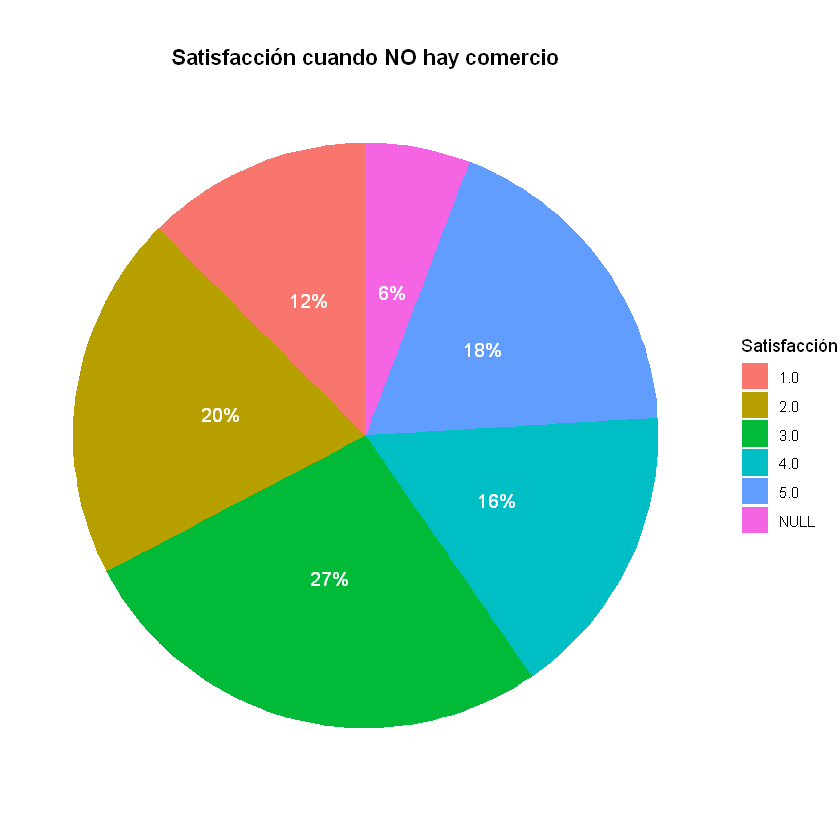

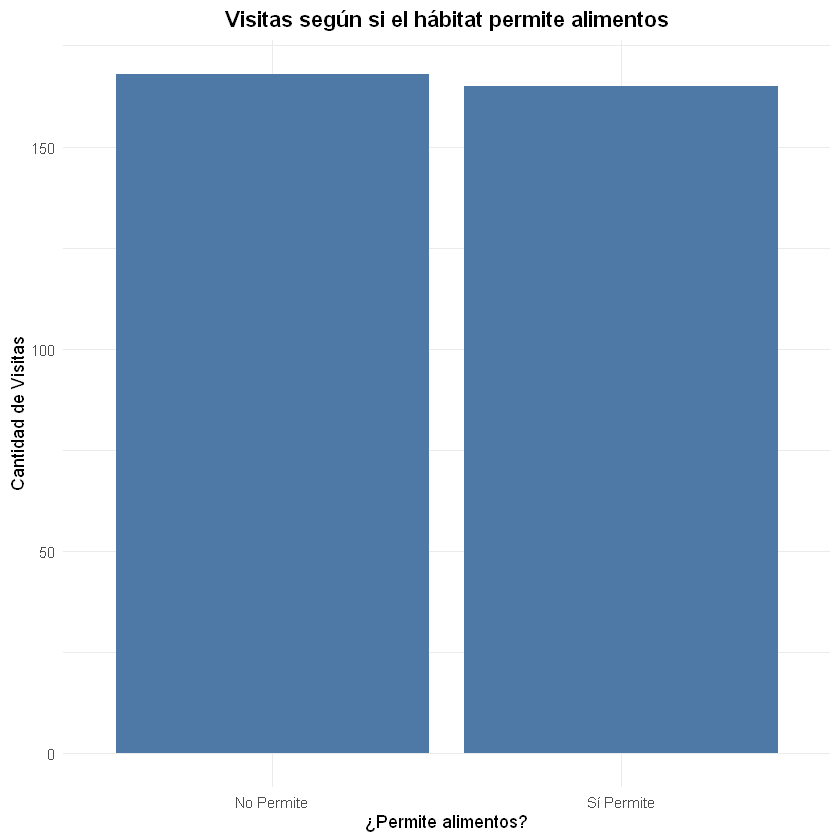

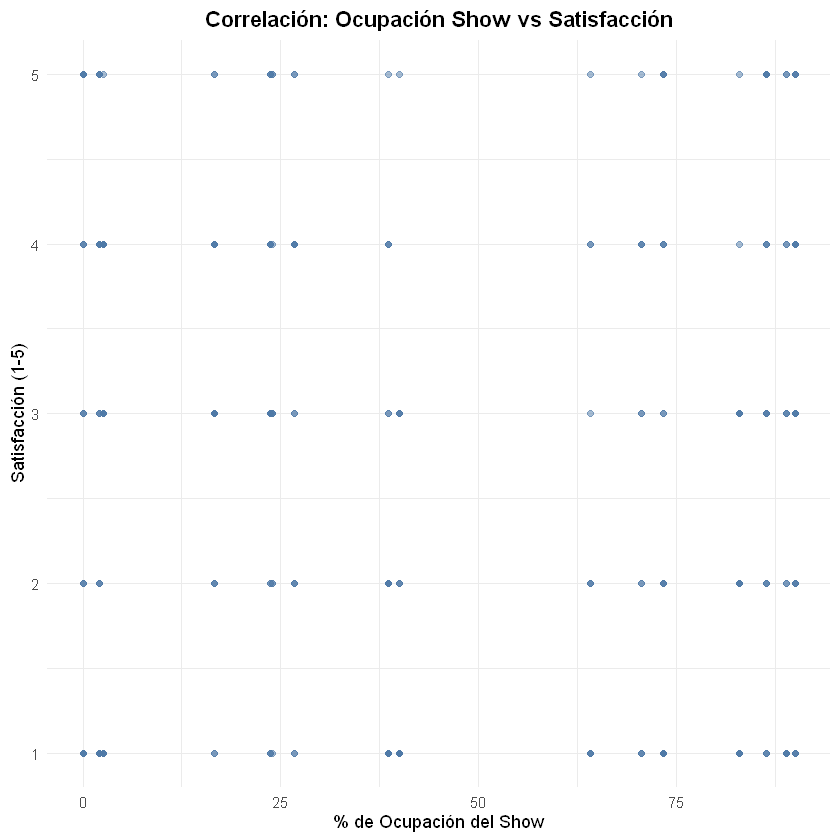

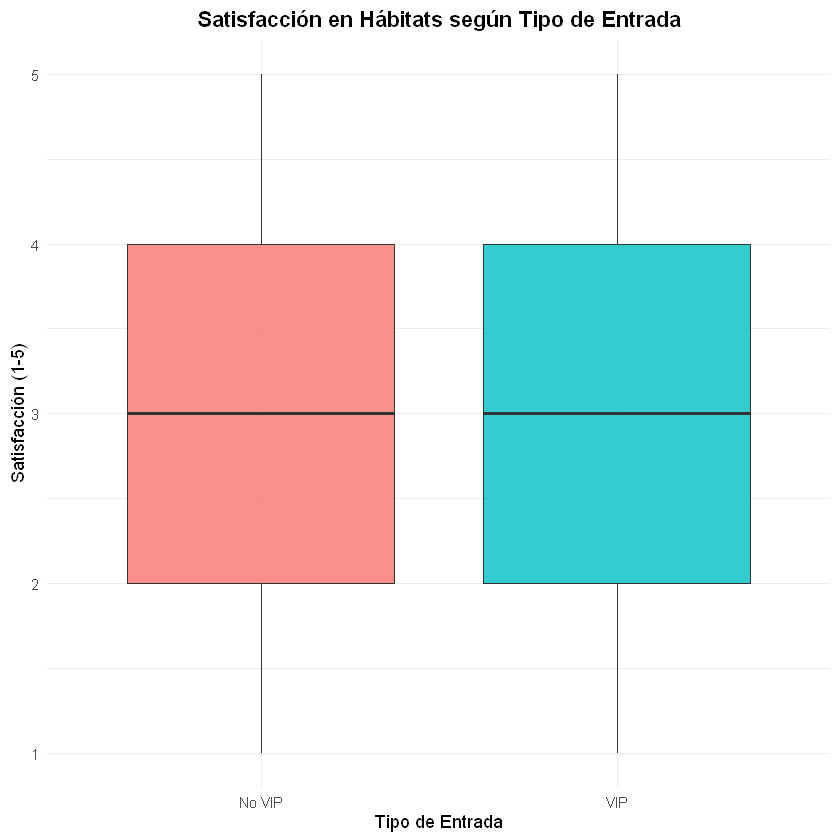

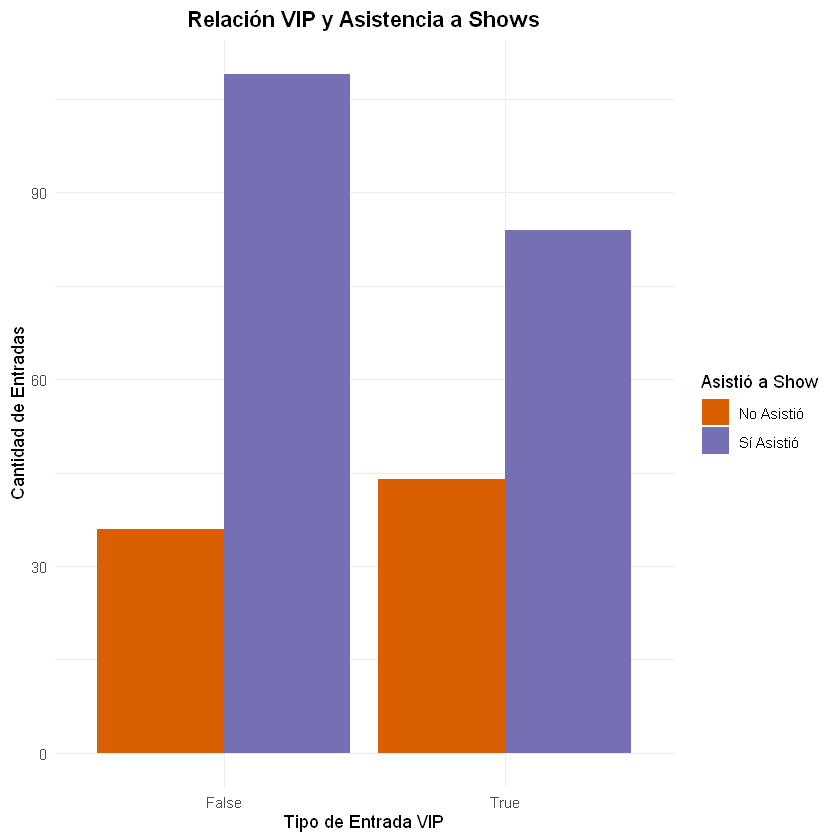

[1] "--- Proceso completado. Archivo 'Reporte_Analisis_Zoo.xlsx' guardado. ---"


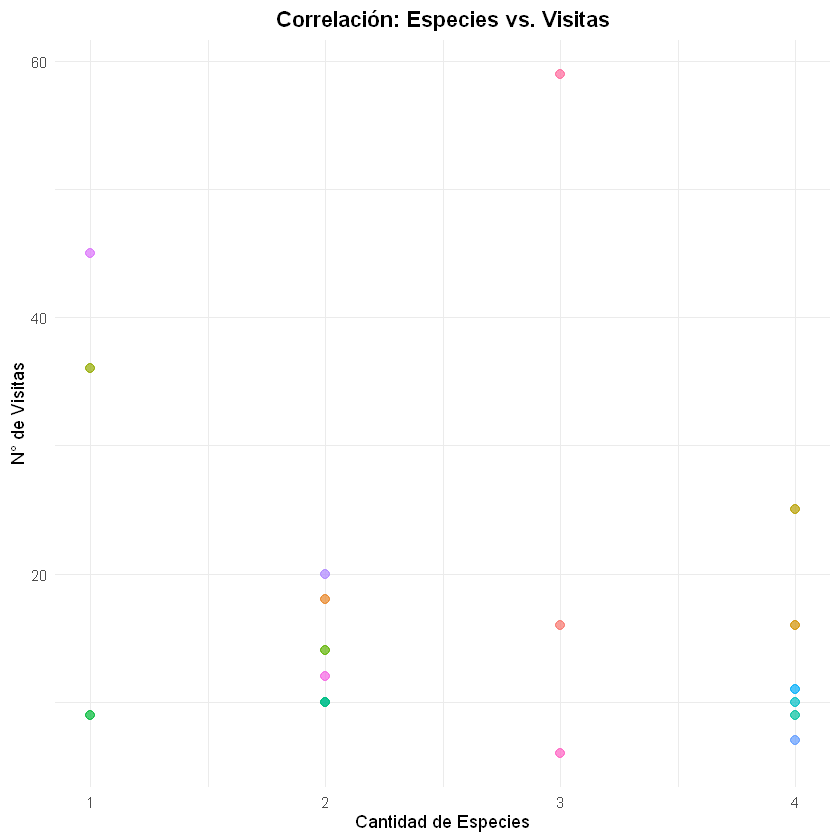

In [17]:
print("--- Exportando resultados a Excel ---")

wb <- createWorkbook()

add_results_to_sheet <- function(workbook, sheet_name, result_list) {
  addWorksheet(workbook, sheet_name)
  if (!is.null(result_list$data)) {
    if (inherits(result_list$data, "table")) {
        df_to_write <- as.data.frame.matrix(result_list$data)
        writeData(workbook, sheet_name, df_to_write, startCol = 1, startRow = 1, rowNames = TRUE)
    } else {
        writeData(workbook, sheet_name, result_list$data, startCol = 1, startRow = 1)
    }
  }
  if (!is.null(result_list$correlation)) {
    corr_df <- data.frame(Correlacion = result_list$correlation)
    writeData(workbook, sheet_name, "Correlación:", startCol = 1, startRow = 25)
    writeData(workbook, sheet_name, corr_df, startCol = 2, startRow = 25)
  }
  if (!is.null(result_list$plot)) {
    print(result_list$plot)
    insertPlot(workbook, sheet_name, startCol = "E", startRow = 2, width = 6, height = 4.5)
  }
  if (!is.null(result_list$plots)) {
    row_num <- 2
    for(plot_item in result_list$plots) {
      print(plot_item)
      insertPlot(workbook, sheet_name, startCol = "E", startRow = row_num, width = 6, height = 4.5)
      row_num <- row_num + 25
    }
  }
}

resultados_completos <- list(
  p1 = resultado_p1, p2 = resultado_p2, p3 = resultado_p3, p4 = resultado_p4,
  p5 = resultado_p5, p6 = resultado_p6, p7 = resultado_p7, p8 = resultado_p8,
  p9 = resultado_p9, p10 = resultado_p10, p11 = resultado_p11
)

# P1 - P2
add_results_to_sheet(wb, "P1. Entradas por Día", resultados_completos$p1)
add_results_to_sheet(wb, "P2. Visitas por Mes", resultados_completos$p2)

# Manejo especial para P3
addWorksheet(wb, "P3. Analisis Habitats")

writeData(wb, "P3. Analisis Habitats", "Tabla: Distribución de Tipos de Hábitat", startCol = "A", startRow = 1)
writeData(wb, "P3. Analisis Habitats", as.data.frame(resultados_completos$p3$data$distribucion_tipos), startCol = "A", startRow = 2)
print(resultados_completos$p3$plots$distribucion_tipos)
insertPlot(wb, "P3. Analisis Habitats", startCol = "H", startRow = 2, width = 5, height = 4)

writeData(wb, "P3. Analisis Habitats", "Tabla: N° de Visitas por Hábitat", startCol = "A", startRow = 27)
writeData(wb, "P3. Analisis Habitats", as.data.frame(resultados_completos$p3$data$visitas_por_habitat), startCol = "A", startRow = 28)
print(resultados_completos$p3$plots$visitas_por_habitat)
insertPlot(wb, "P3. Analisis Habitats", startCol = "H", startRow = 28, width = 6, height = 5)

writeData(wb, "P3. Analisis Habitats", "Tabla: N° de Visitantes por Tipo de Ambiente", startCol = "A", startRow = 55)
writeData(wb, "P3. Analisis Habitats", as.data.frame(resultados_completos$p3$data$visitas_por_ambiente), startCol = "A", startRow = 56)
print(resultados_completos$p3$plots$visitas_por_ambiente)
insertPlot(wb, "P3. Analisis Habitats", startCol = "H", startRow = 56, width = 6, height = 4.5)

# P4 - P7
add_results_to_sheet(wb, "P4. Duración Shows", resultados_completos$p4)
add_results_to_sheet(wb, "P5. Visitas por Hora", resultados_completos$p5)
add_results_to_sheet(wb, "P6. Satisfacción y Comercio", resultados_completos$p6)
add_results_to_sheet(wb, "P7. Visitas y Alimentos", resultados_completos$p7)

# Manejo de P8
addWorksheet(wb, "P8. Ocupación vs Satisfacción")
corr_df_p8 <- data.frame(Correlacion = resultados_completos$p8$correlation)
writeData(wb, "P8. Ocupación vs Satisfacción", "Correlación:", startCol = 1, startRow = 1)
writeData(wb, "P8. Ocupación vs Satisfacción", corr_df_p8, startCol = 2, startRow = 1)
writeData(wb, "P8. Ocupación vs Satisfacción", resultados_completos$p8$data, startCol = 1, startRow = 4)
print(resultados_completos$p8$plot)
insertPlot(wb, "P8. Ocupación vs Satisfacción", startCol = "L", startRow = 2, width = 6, height = 4.5)

# Manejo de P9
addWorksheet(wb, "P9. VIP vs Satisfacción")
writeData(wb, "P9. VIP vs Satisfacción", resultados_completos$p9$data, startCol = 1, startRow = 1)
corr_df_p9 <- data.frame(Correlacion = resultados_completos$p9$correlation)
writeData(wb, "P9. VIP vs Satisfacción", "Correlación:", startCol = 1, startRow = 25)
writeData(wb, "P9. VIP vs Satisfacción", corr_df_p9, startCol = 2, startRow = 25)
print(resultados_completos$p9$plot)
insertPlot(wb, "P9. VIP vs Satisfacción", startCol = "I", startRow = 2, width = 6, height = 4.5)

# P10
add_results_to_sheet(wb, "P10. VIP vs Asistencia Shows", resultados_completos$p10)

# Manejo de P11
addWorksheet(wb, "P11. Especies vs Visitas")
writeData(wb, "P11. Especies vs Visitas", "Datos usados para el gráfico:", startCol = 1, startRow = 1)
writeData(wb, "P11. Especies vs Visitas", resultados_completos$p11$data, startCol = 1, startRow = 2)
corr_df_p11 <- data.frame(Correlacion = resultados_completos$p11$correlation)
writeData(wb, "P11. Especies vs Visitas", "Correlación:", startCol = 1, startRow = 25)
writeData(wb, "P11. Especies vs Visitas", corr_df_p11, startCol = 2, startRow = 25)
print(resultados_completos$p11$plot)
insertPlot(wb, "P11. Especies vs Visitas", startCol = "G", startRow = 2, width = 6, height = 5)

# archivo final
saveWorkbook(wb, "Reporte_Analisis_Zoo.xlsx", overwrite = TRUE)

print("--- Proceso completado. Archivo 'Reporte_Analisis_Zoo.xlsx' guardado. ---")

## **Comparativa entre ®️ y Python 🐍**

Existen varias diferencias entre estos dos lenguajes y al trabajar primero con Python hay muchas cosas que asumimos se darían por defecto en R como lo hace Python pero no fue así.

Un error recurrente en el desarrollo fue el de "non-numeric argument to binary operator". Esto ocurrió porque R es más estricto con los tipos de datos. Funciones como "cor()" o el operador de división "/" que esperan columnas numéricas (numeric), pero las columnas (cupos_ocupados, satisfaccion, VIP) se habían leído como texto (character).

Pandas en Python es más flexible. Usualmente puede realizar operaciones matemáticas en columnas que contienen mezclas de números y texto que se pueden interpretar como números, a veces sin un error explícito (como en R).

En Pandas la función value_counts() por defecto ignora los valores faltantes (NaN). Esto es conveniente y rápido, pero puede ocultar problemas de calidad de datos a diferencia de R que los muestra y se tienen que manejar los valores NULL

Otro detalle que cambia al usar R es la visualización de los datos, por ejemplo al repsonder la pregunta 1, tenemos estos dos gráficos:

<div style="text-align: center;">
  <figure style="display: inline-block; margin: 10px;">
    <img src="imagenes/gráfico_entradas_de_adulto_por_día.png" width="400">
    <figcaption style="font-style: italic;">Figura 1: Foto gráfico R de entradas de adulto por día</figcaption>
  </figure>

  <figure style="display: inline-block; margin: 10px;">
    <img src="imagenes/gráfico_entradas_de_adulto_por_día_python.png" width="400">
    <figcaption style="font-style: italic;">Figura 2: Foto gráfico Python de entradas de adulto por día</figcaption>
  </figure>
</div>

Ninguno de los dos gráficos está ordenado de acuerdo a los días de la semana, pero usando librerías de python por defecto se ordenan las barras de mayor a menor.

En sintesís, ambos lenguajes tienen ventajas y desventajas, el hecho de que R sea un lenguaje especializado para estádisticas y análisis de datos lo hace llamativo para un proyecto como este, sin embargo quienes trabajamos en este proyecto no somos especialistas del área por lo que tuvimos mayores dificultades al aplicarlo en este proyecto que usando Python el cual es un lenguaje más popular, con una comunidad más grande y variada y tiene una sintaxis con la que estamos mucho más familiarizados. 


